# OTOMOTO Data Analysis
In this project, we will analyze data from the Polish car sales portal - [OTOMOTO](https://www.otomoto.pl "otomoto"). We will answer the following questions:
- What affects the selling price of a car?
- Is there a difference in the effect of different features on price in different price ranges?
- How does location affect the price and popularity of particular cars?

### Table of Contents

* [Get the Data](#get_the_data)
* [Analyze data](#analyze_data)
    * [Missing values](#missing_values)
    * [Columns analysis](#columns_analysis)
        * [id](#column_id)
        * [Cena](#column_cena)
        * [Oferta od](#column_oferta_od)
        * [Kategoria](#column_kategoria)
        * [Marka pojazdu](#column_marka_pojazdu)
        * [Model pojazdu](#column_model_pojazdu)
        * [Wersja](#column_wersja)
        * [Rok produkcji](#column_rok_produkcji)
        * [Przebieg](#column_przebieg)
        * [Pojemność skokowa](#column_pojemnosc_skokowa)
        * [Rodzaj paliwa](#column_rodzaj_paliwa)
        * [Moc](#column_moc)
        * [Skrzynia biegów](#column_skrzynia_biegow)
        * [Napęd](#column_naped)
        * [Spalanie W Mieście](#column_spalanie_w_miescie)
        * [Typ nadwozia](#column_typ_nadwozia)
        * [Emisja CO2](#column_emisjaco2)
        * [Liczba drzwi](#column_liczba_drzwi)
        * [Liczba miejsc](#column_liczba_miejsc)
        * [Kolor](#column_kolor)
        * [Rodzaj koloru](#column_rodzaj_koloru)
        * [Możliwość finansowania](#column_mozliwosc_finansowania)
        * [Zarejestrowany w Polsce](#column_zarejestrowany_w_polsce)
        * [Pierwszy własciciel](#column_pierwszy_wlasciciel)
        * [Bezwypadkowy](#column_bezwypadkowy)
        * [Serwisowany w ASO](#column_serwisowany_w_aso)
        * [Stan](#column_stan)
        * [Wyposażenie](#column_wyposazenie)
        * [Opis](#column_opis)
        * [Miasto](#column_miasto)
        * [Sz. geograficzna](#column_sz_geograficzna)
        * [Dł. geograficzna](#column_dl_geograficzna)
        * [Generacja](#column_generacja)
        * [Faktura VAT](#column_faktura_vat)
        * [Leasing](#column_leasing)
        * [Kraj pochodzenia](#column_kraj_pochodzenia)
        * [Pierwsza rejestracja](#column_pierwsza_rejestracja)
        * [Numer rejestracyjny pojazdu](#column_numer_rejestracyjny_pojazdu)
        * [VAT marża](#column_vat_marza)
        * [Uszkodzony](#column_uszkodzony)
* [Summary](#column_summary)
        
###### Imports

In [1]:
# Data Analysis imports
import numpy as np
import pandas as pd

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

# Functions
import functions
import visualize

# Get the Data <a class='anchor' id='get_the_data'></a>
The data was gathered by web-scraping the otomoto.pl portal.

In [2]:
data = pd.read_csv('otomoto_data.csv', low_memory=False)
# Drop unnamed columns
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
# Change column names to all Polish
data.rename(columns={'Price': 'Cena', 'Features': 'Wyposażenie', 
                     'Description': 'Opis', 'City': 'Miasto', 
                     'Latitude': 'Sz. geograficzna', 'Longitude': 'Dł. geograficzna'}, 
            inplace=True)
data.head()

,id,Cena,Oferta od,Kategoria,Marka pojazdu,Model pojazdu,Wersja,Rok produkcji,Przebieg,Pojemność skokowa,...,Liczba pozostałych rat,Wartość wykupu,Uszkodzony,lub do (przebieg km),Tuning,Gwarancja dealerska (w cenie),Kierownica po prawej (Anglik),Homologacja ciężarowa,Zarejestrowany jako zabytek,VIN
0,6050701934,368 000 PLN,Firmy,Osobowe,Maserati,Quattroporte,S Q4,2017,3 850 km,2 979 cm3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6050567656,419 000 PLN,Firmy,Osobowe,Lexus,LS,NaN,2018,44 911 km,3 445 cm3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6050513569,69 000 PLN,Osoby prywatnej,Osobowe,Lexus,IS,NaN,2016,80 000 km,2 000 cm3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6050371114,349 900 PLN,Firmy,Osobowe,Lexus,LS,500 Prestige AWD,2018,62 670 km,3 445 cm3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6050117922,1 790 000 PLN,Firmy,Osobowe,Rolls-Royce,Ghost,NaN,2018,1 785 km,6 592 cm3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyze data <a class='anchor' id='analyze_data'></a>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143343 entries, 0 to 143342
Data columns (total 55 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             143343 non-null  int64  
 1   Cena                           143343 non-null  object 
 2   Oferta od                      143343 non-null  object 
 3   Kategoria                      143343 non-null  object 
 4   Marka pojazdu                  143343 non-null  object 
 5   Model pojazdu                  143343 non-null  object 
 6   Wersja                         93658 non-null   object 
 7   Rok produkcji                  143343 non-null  int64  
 8   Przebieg                       143194 non-null  object 
 9   Pojemność skokowa              142299 non-null  object 
 10  Rodzaj paliwa                  143343 non-null  object 
 11  Moc                            143228 non-null  object 
 12  Skrzynia biegów               

There is a lot of missing data in the dataset and a lot of quantitative data such as Price and Mileage have data type: object.

## Missing values <a class='anchor' id='missing_values'></a>

In [5]:
# % of NaN per column
nan_per_col  = data.isnull().sum(axis=0) * 100 / len(data)
print('% of NaN per column')
print('-' * 50)
print(nan_per_col)

% of NaN per column
--------------------------------------------------
id                                0.000000
Cena                              0.000000
Oferta od                         0.000000
Kategoria                         0.000000
Marka pojazdu                     0.000000
Model pojazdu                     0.000000
Wersja                           34.661616
Rok produkcji                     0.000000
Przebieg                          0.103946
Pojemność skokowa                 0.728323
Rodzaj paliwa                     0.000000
Moc                               0.080227
Skrzynia biegów                   0.074646
Napęd                             7.785521
Spalanie W Mieście               41.477435
Typ nadwozia                      0.000000
Emisja CO2                       53.106186
Liczba drzwi                      0.313235
Liczba miejsc                     4.983152
Kolor                             0.000000
Rodzaj koloru                    25.416658
Możliwość finansowania    

In [6]:
print('Columns with most missing data')
print('-' * 50)
print(nan_per_col[nan_per_col > 90])

Columns with most missing data
--------------------------------------------------
Okres gwarancji producenta       97.871539
Spalanie W Cyklu Mieszanym       96.735104
Spalanie Poza Miastem            96.883001
Filtr cząstek stałych            94.072260
Opłata początkowa                99.469106
Miesięczna rata                  96.707199
Liczba pozostałych rat           99.415388
Wartość wykupu                   99.501196
Uszkodzony                       93.964128
lub do (przebieg km)             97.681087
Tuning                           99.332371
Gwarancja dealerska (w cenie)    96.681387
Kierownica po prawej (Anglik)    99.762807
Homologacja ciężarowa            99.455153
Zarejestrowany jako zabytek      99.901635
VIN                              99.996512
dtype: float64


Columns with so many missing data will be removed from the dataset because it is hard to replace the missing data in them with another value. Let's just leave the column: 'Uszkodzony' (Damaged) because it seems to have a high impact on predicting price.

In [8]:
columns_to_remove = nan_per_col[nan_per_col > 90].keys().tolist()
columns_to_remove.remove('Uszkodzony')
data.drop(columns_to_remove, axis=1, inplace=True)

## Columns analysis  <a class='anchor' id='columns_analysis'></a>

#### Column 'id'  <a class='anchor' id='column_id'></a>
**To be removed**

In [7]:
functions.NaN_column_report(data, 'id')

Column:  id
Data type:  int64
Number of NaN values:  0 / 143343
Unique values:  [6050701934 6050567656 6050513569 6050371114 6050117922 6049995548
 6047271517 6040425697 6038764767 6031969107]
Number of unique values:  143343


In [8]:
data['id'].head()

0    6050701934
1    6050567656
2    6050513569
3    6050371114
4    6050117922
Name: id, dtype: int64

The 'id' column corresponds to the car sale id on otomoto. It does not affect the prediction of car price and should be **removed**.

In [9]:
data.drop('id', axis=1, inplace=True)

#### Column 'Cena' (Price)  <a class='anchor' id='column_cena'></a>
**Type**: numerical <br>
**Needed preprocessing**: convert EUR to PLN, convert string to float, remove outliers

In [10]:
functions.NaN_column_report(data, 'Cena')

Column:  Cena
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['368 000        PLN' '419 000        PLN' '69 000        PLN'
 '349 900        PLN' '1 790 000        PLN' '104 900        PLN'
 '64 900        PLN' '89 900        PLN' '288 500        PLN'
 '66 900        PLN']
Number of unique values:  8404


In [11]:
# Check if only PLN available
data['Cena'].str[-3:].value_counts()

PLN    143091
EUR       252
Name: Cena, dtype: int64

Prices are described in string format along with currency information. These need to be converted to numeric values and converted to a single currency.

In [9]:
pln_data = data.index[data['Cena'].str.contains('PLN')]
eur_data = data.index[data['Cena'].str.contains('EUR')]
# Convert strings with PLN prices into float values
data.update(data.loc[pln_data]['Cena'].apply(lambda x: float(str(x).rstrip('PLN').replace(' ', '')
                                                             .replace(',','.'))))
# Convert string with EUR prices into PLN float values
# Currency rate: EUR -> PLN 4.6
data.update(data.loc[eur_data]['Cena'].apply(lambda x: float(str(x).rstrip('EUR').replace(' ', '')
                                                             .replace(',','.')) * 4.6))
data['Cena'] = data['Cena'].astype(float)
data['Cena'].head()

0     368000.0
1     419000.0
2      69000.0
3     349900.0
4    1790000.0
Name: Cena, dtype: float64

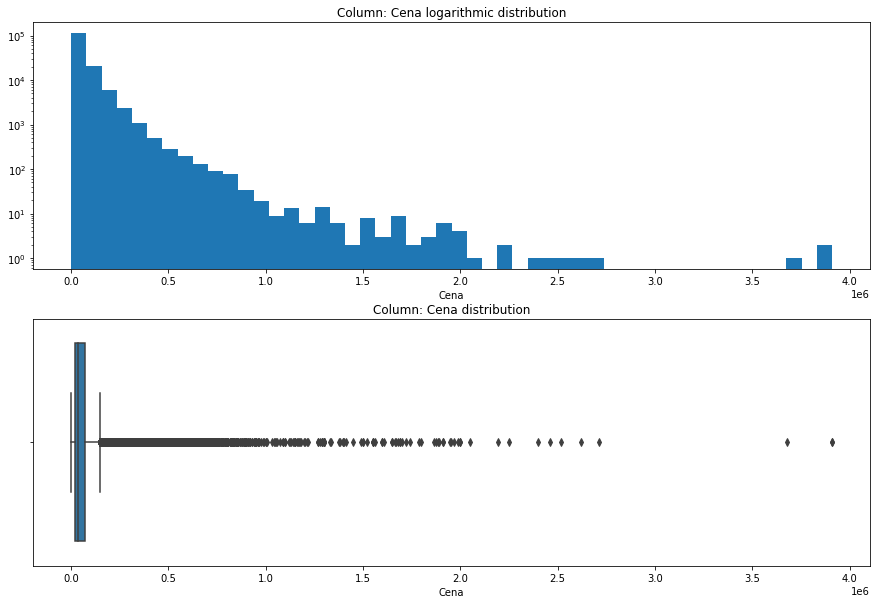

In [13]:
visualize.distribution(data, 'Cena', log=100)

In [14]:
# For visualization purposes
data['Log_Cena'] = data['Cena'].apply(lambda x: np.log(x))

Some of the prices stand out strongly from the rest.

#### Column 'Oferta od' (Offer from)  <a class='anchor' id='column_oferta_od'></a>
**Type**: categorical <br>
**Needed preprocessing**: None <br>
**Relation with Price**: 'Firmy' > 'Osoby prywatne'

Column:  Oferta od
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Firmy' 'Osoby prywatnej']
Number of unique values:  2


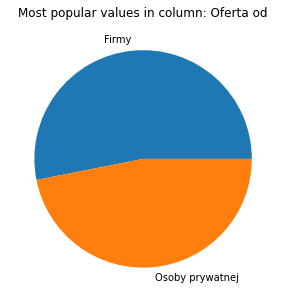

In [15]:
functions.NaN_column_report(data, 'Oferta od')
visualize.values_occurence(data, 'Oferta od', pie=True)

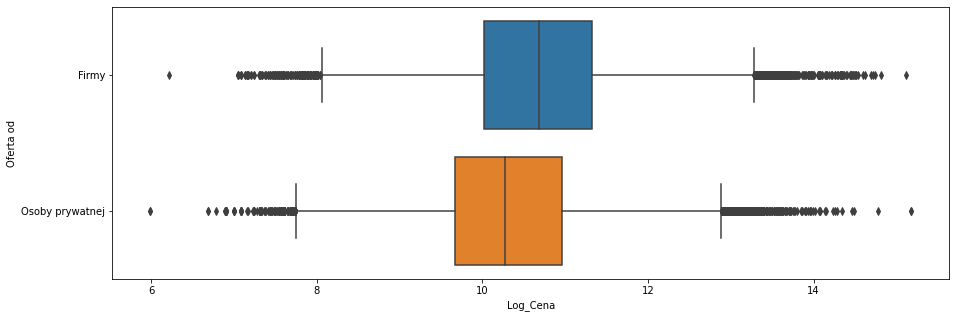

In [16]:
visualize.boxplot_price(data, 'Oferta od')

#### Column 'Kategoria' (Category)  <a class='anchor' id='column_kategoria'></a>
**To be removed**

In [17]:
functions.NaN_column_report(data, 'Kategoria')

Column:  Kategoria
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Osobowe']
Number of unique values:  1


Only one possible value, so the column should be deleted.

#### Column 'Marka pojazdu' (Car brand)  <a class='anchor' id='column_marka_pojazdu'></a>
**Type**: categorical <br>
**Relation with Price**: some brands are more expensive

Column:  Marka pojazdu
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Maserati' 'Lexus' 'Rolls-Royce' 'BMW' 'Audi' 'Jaguar' 'Mazda'
 'Mercedes-Benz' 'Renault' 'Škoda']
Number of unique values:  111


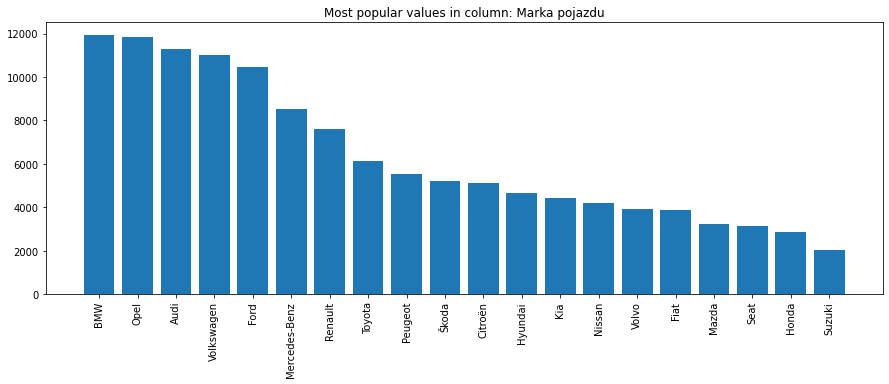

In [18]:
functions.NaN_column_report(data, 'Marka pojazdu')
visualize.values_occurence(data, 'Marka pojazdu')

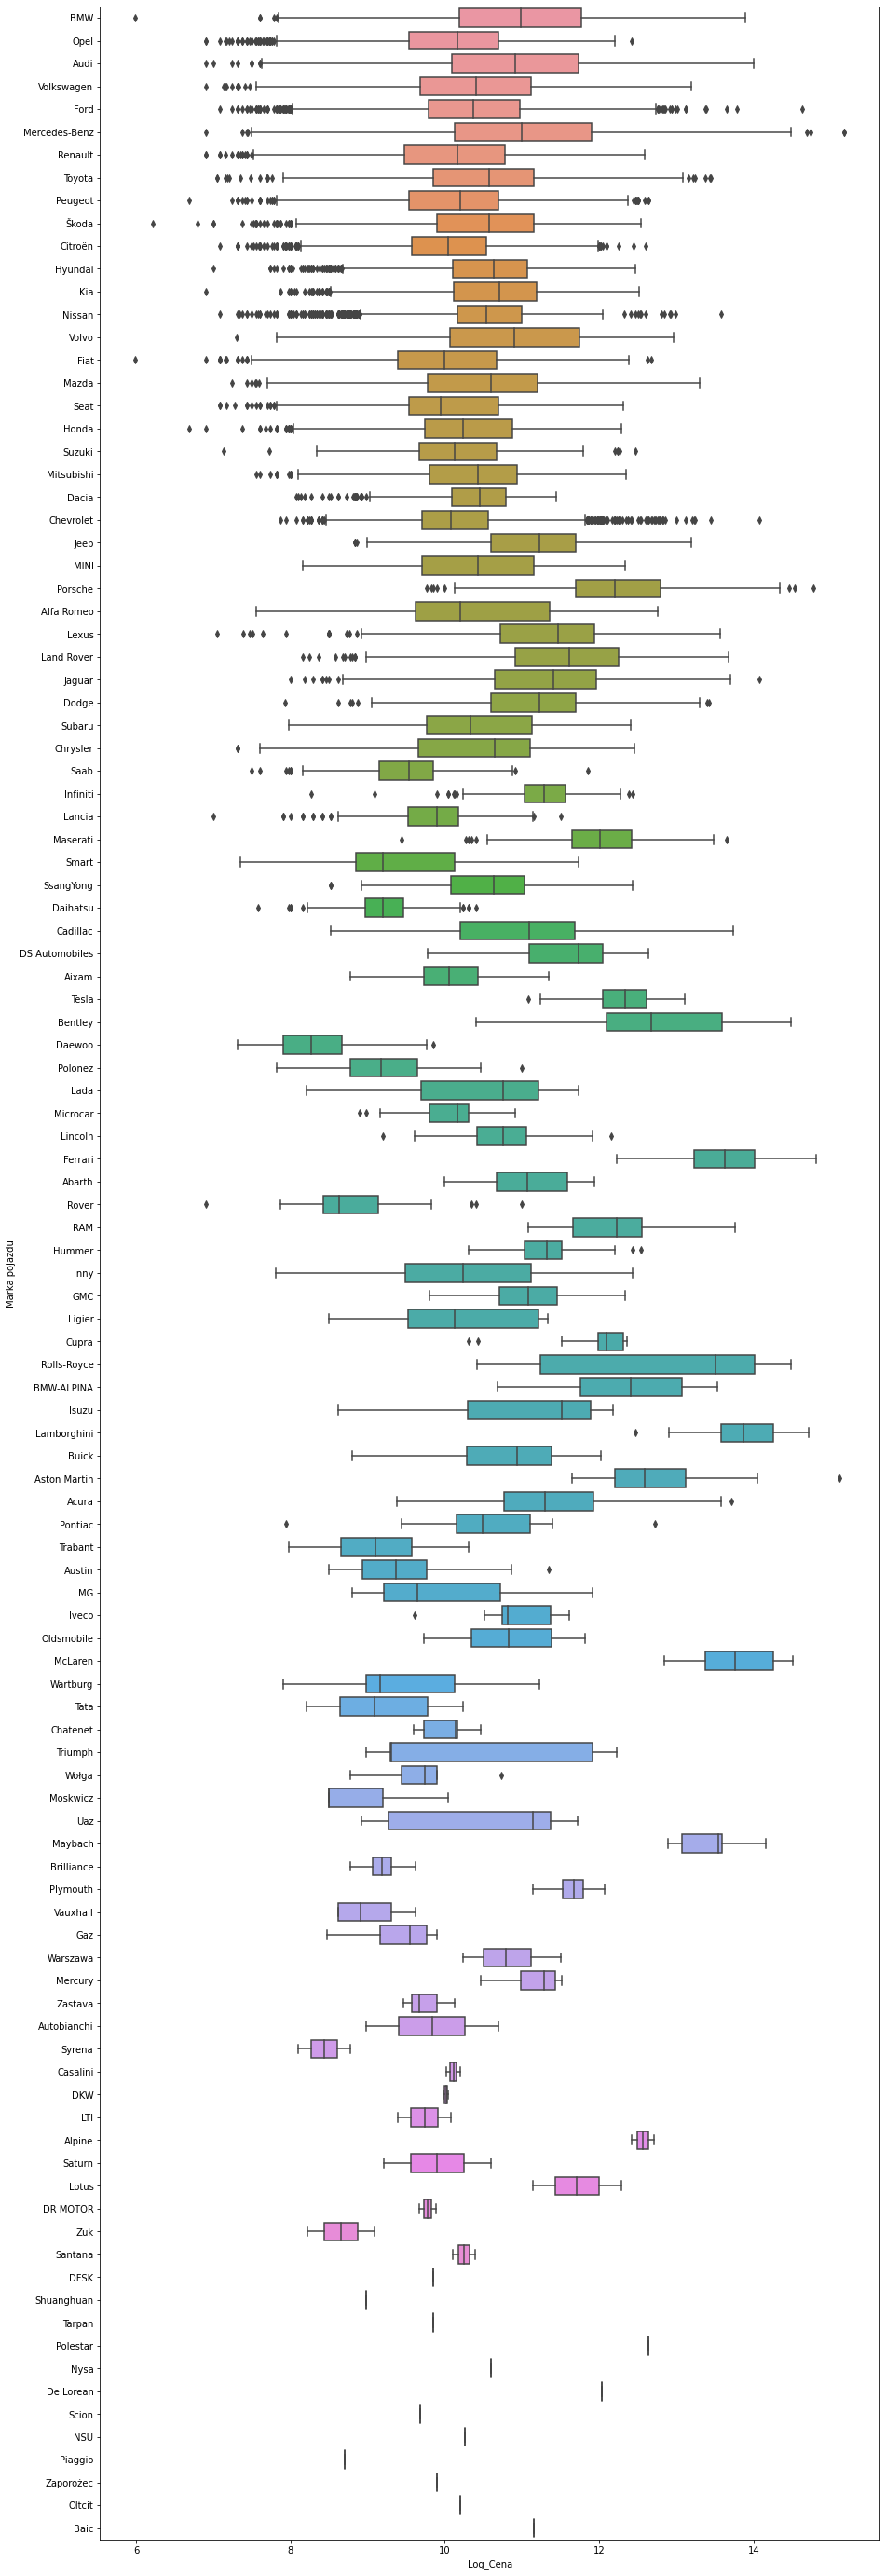

In [19]:
visualize.boxplot_price(data, 'Marka pojazdu', figsize=(15, 50))

#### Column 'Model pojazdu' (Car model)  <a class='anchor' id='column_model_pojazdu'></a>
**Type**: categorical <br>
**Can be removed**

Column:  Model pojazdu
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Quattroporte' 'LS' 'IS' 'Ghost' 'Seria 5' 'A4' 'A5' '3GT' 'XJ' 'Seria 7']
Number of unique values:  1211


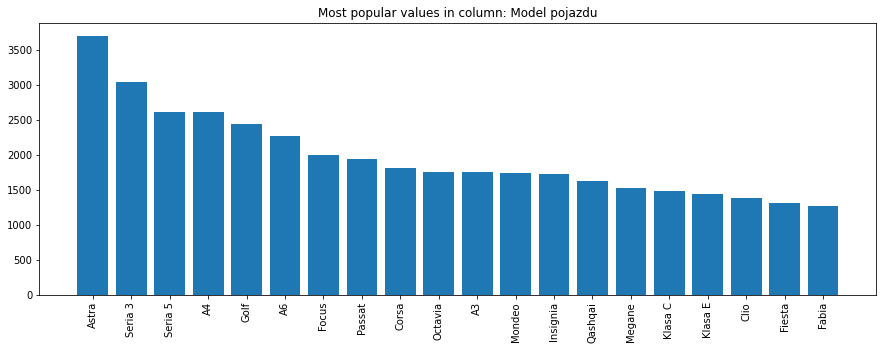

In [20]:
functions.NaN_column_report(data, 'Model pojazdu')
visualize.values_occurence(data, 'Model pojazdu')

Large number of possible values. Potentially for deletion.

#### Column 'Wersja' (Version)  <a class='anchor' id='column_wersja'></a>
**Type**: categorical <br>
**To be removed**

Column:  Wersja
Data type:  object
Number of NaN values:  49685 / 143343
Unique values:  ['S Q4' nan '500 Prestige AWD' '530d xDrive' 'M550i xDrive sport'
 '3.0 T AWD LWB Portfolio' '520d' '730d xDrive' 'iii-2012'
 '63 AMG S 4-Matic']
Number of unique values:  16212


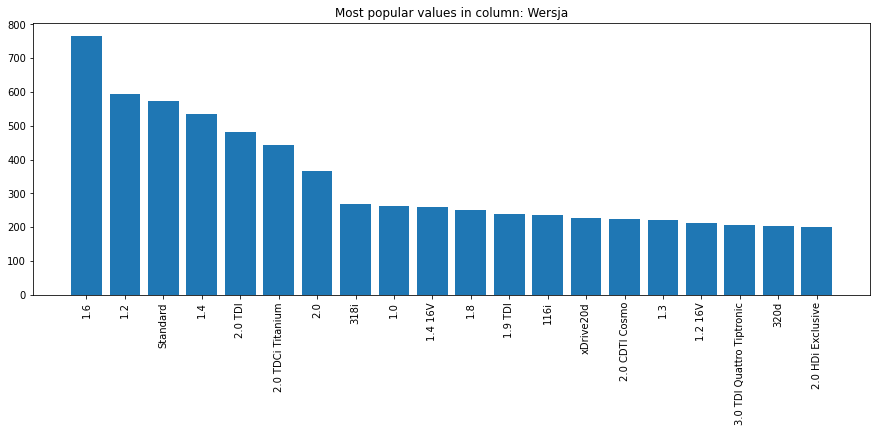

In [21]:
functions.NaN_column_report(data, 'Wersja')
visualize.values_occurence(data, 'Wersja')

A very large number of missing values that cannot be sensibly replaced. The column should be removed.

#### Column 'Rok produkcji' (Year of production)  <a class='anchor' id='column_rok_produkcji'></a>
**Type**: numerical

Column:  Rok produkcji
Data type:  int64
Number of NaN values:  0 / 143343
Unique values:  [2017 2018 2016 2015 2014 2012 2013 2019 2020 2021]
Number of unique values:  90


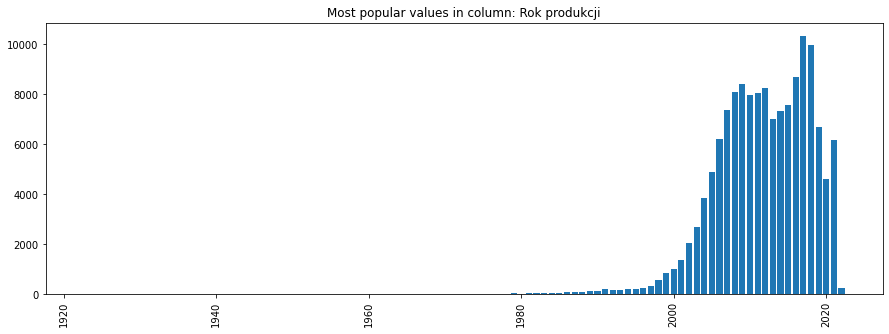

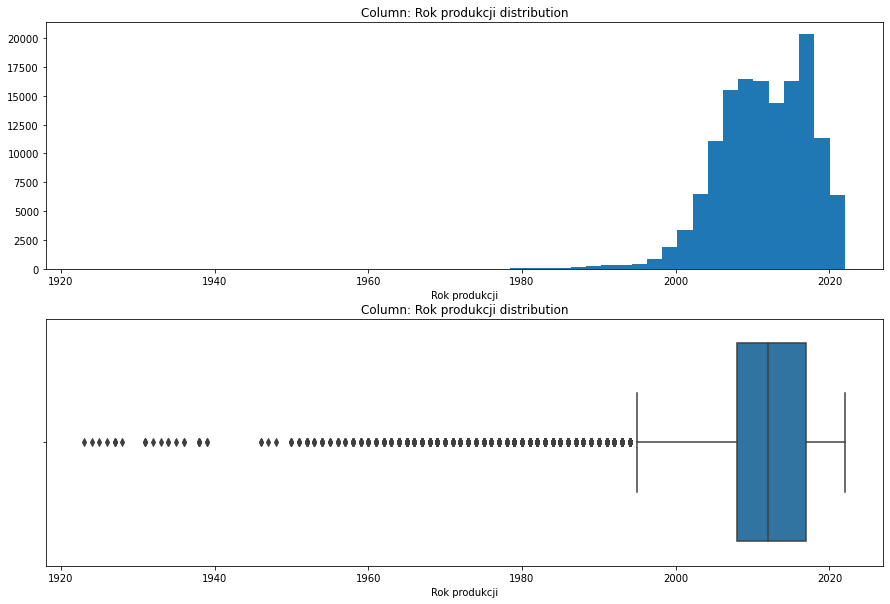

In [22]:
functions.NaN_column_report(data, 'Rok produkcji')
visualize.values_occurence(data, 'Rok produkcji', max_columns=len(data['Rok produkcji'].unique()))
visualize.distribution(data, 'Rok produkcji')

#### Column 'Przebieg' (Mileage)  <a class='anchor' id='column_przebieg'></a>
**Type**: numerical <br>
**Needed preprocessing**: convert string to float, remove outliers, remove rows with NaN

In [23]:
functions.NaN_column_report(data, 'Przebieg')

Column:  Przebieg
Data type:  object
Number of NaN values:  149 / 143343
Unique values:  ['3 850 km' '44 911 km' '80 000 km' '62 670 km' '1 785 km' '215 000 km'
 '195 000 km' '50 300 km' '3 120 km' '184 000 km']
Number of unique values:  44123


In [24]:
# Check if only km available
data['Przebieg'].str[-2:].value_counts()

km    143194
Name: Przebieg, dtype: int64

The mileage is described by a string along with information about the unit used. It should be converted to float values.

In [25]:
data.update(data['Przebieg'].apply(lambda x: float(str(x).rstrip('km').replace(' ', ''))))
data['Przebieg'] = data['Przebieg'].astype(float)
data['Przebieg'].head()

0     3850.0
1    44911.0
2    80000.0
3    62670.0
4     1785.0
Name: Przebieg, dtype: float64

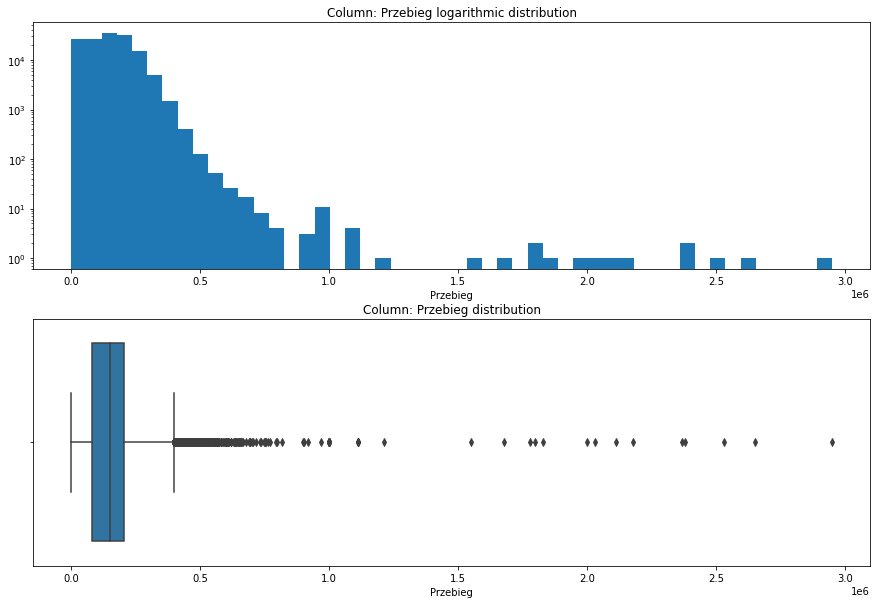

In [26]:
visualize.distribution(data, 'Przebieg', log=True)

Some of the values stand out strongly from the rest. Should be removed.

In [27]:
# For visualization purposes
data['Log_Przebieg'] = data['Przebieg'].apply(lambda x: np.log(x))

#### Column 'Pojemność skokowa' (Cubic capacity)  <a class='anchor' id='column_pojemnosc_skokowa'></a>
**Type**: numerical <br>
**Needed preprocessing**: convert string to float, remove NaN

In [28]:
functions.NaN_column_report(data, 'Pojemność skokowa')

Column:  Pojemność skokowa
Data type:  object
Number of NaN values:  1044 / 143343
Unique values:  ['2 979 cm3' '3 445 cm3' '2 000 cm3' '6 592 cm3' '2 993 cm3' '1 968 cm3'
 '4 395 cm3' '2 995 cm3' '1 995 cm3' '1 998 cm3']
Number of unique values:  1079


In [29]:
# Check if only cm3 available
data['Pojemność skokowa'].str[-3:].value_counts()

cm3    142299
Name: Pojemność skokowa, dtype: int64

Column is described by a string along with information about the unit used. It should be converted to float values.

In [30]:
data.update(data['Pojemność skokowa'].apply(lambda x: float(str(x).rstrip('cm3').replace(' ', ''))))
data['Pojemność skokowa'] = data['Pojemność skokowa'].astype(float)
data['Pojemność skokowa'].head()

0    2979.0
1    3445.0
2    2000.0
3    3445.0
4    6592.0
Name: Pojemność skokowa, dtype: float64

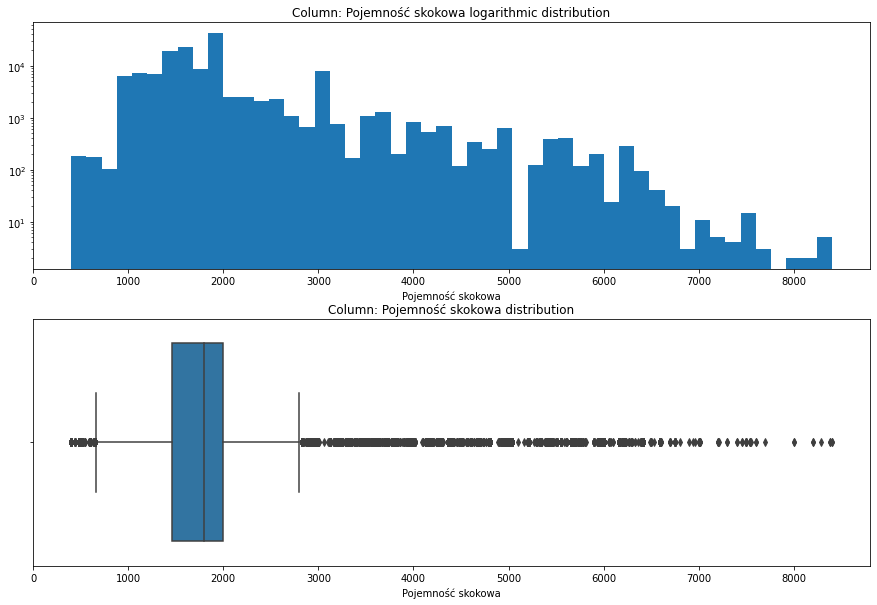

In [31]:
visualize.distribution(data, 'Pojemność skokowa', log=True)

In [32]:
# For visualization purposes
data['Log_Pojemność_skokowa'] = data['Pojemność skokowa'].apply(lambda x: np.log(x))

#### Column 'Rodzaj paliwa' (Fuel type)  <a class='anchor' id='column_rodzaj_paliwa'></a>
**Type**: categorical <br>
**Relation with Price**: 'Hybryda' and 'Elektryczny' > Others

Column:  Rodzaj paliwa
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Benzyna' 'Diesel' 'Elektryczny' 'Hybryda' 'Benzyna+LPG' 'Benzyna+CNG']
Number of unique values:  6


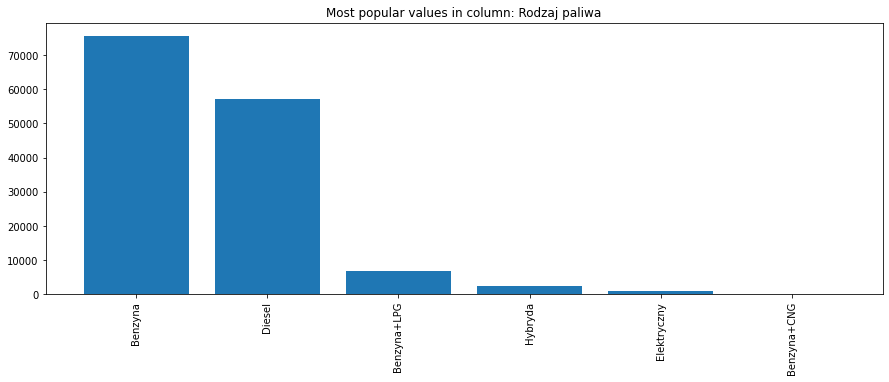

In [33]:
functions.NaN_column_report(data, 'Rodzaj paliwa')
visualize.values_occurence(data, 'Rodzaj paliwa')

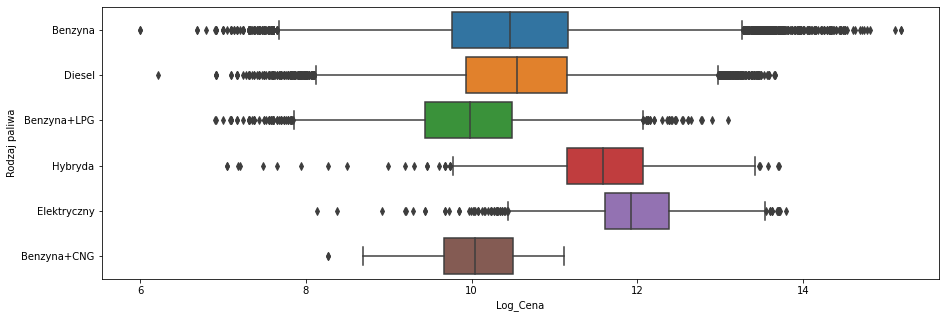

In [34]:
visualize.boxplot_price(data, 'Rodzaj paliwa')

#### Column 'Moc' (Power)  <a class='anchor' id='column_moc'></a>
**Type**: numerical <br>
**Needed preprocessing**: convert string to float, remove row with NaN, maybe remove outliers

In [35]:
functions.NaN_column_report(data, 'Moc')

Column:  Moc
Data type:  object
Number of NaN values:  115 / 143343
Unique values:  ['430 KM' '417 KM' '245 KM' '420 KM' '570 KM' '258 KM' '150 KM' '462 KM'
 '218 KM' '184 KM']
Number of unique values:  556


In [36]:
# Check if only KM available
data['Moc'].str[-2:].value_counts()

KM    143228
Name: Moc, dtype: int64

In [37]:
data.update(data['Moc'].apply(lambda x: float(str(x).rstrip('KM').replace(' ', ''))))
data['Moc'] = data['Moc'].astype(float)
data['Moc'].head()

0    430.0
1    417.0
2    245.0
3    420.0
4    570.0
Name: Moc, dtype: float64

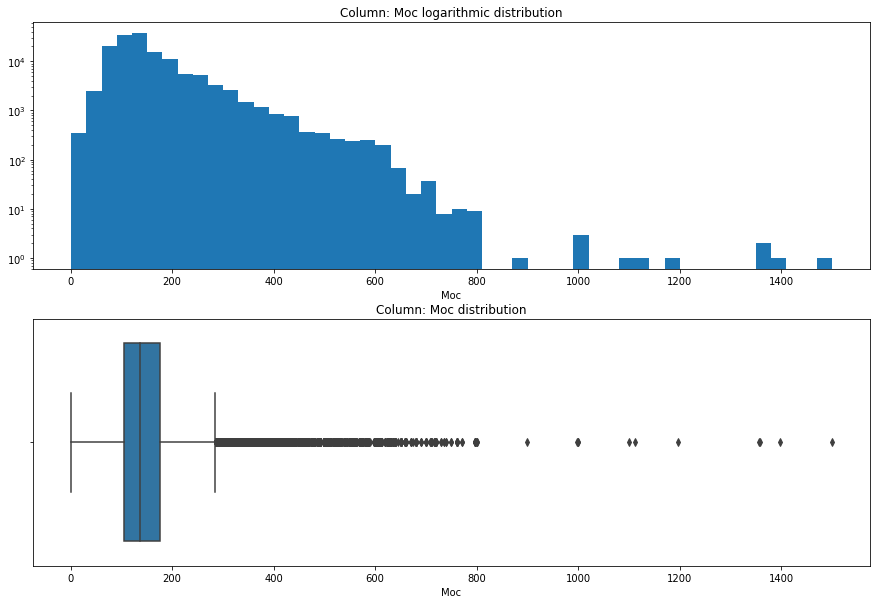

In [38]:
visualize.distribution(data, 'Moc', log=True)

In [39]:
# For visualization purposes
data['Log_Moc'] = data['Moc'].apply(lambda x: np.log(x))

#### Column 'Skrzynia biegów' (Gearbox)  <a class='anchor' id='column_skrzynia_biegow'></a>
**Type**: categorical <br>
**Needed preprocessing**: NaN to most frequent <br>
**Relation with Price**: 'Automatyczna' > 'Manualna'

Column:  Skrzynia biegów
Data type:  object
Number of NaN values:  107 / 143343
Unique values:  ['Automatyczna' 'Manualna' nan]
Number of unique values:  3


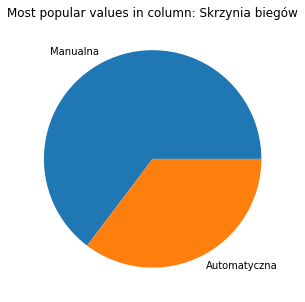

In [40]:
functions.NaN_column_report(data, 'Skrzynia biegów')
visualize.values_occurence(data, 'Skrzynia biegów', pie=True)

There are some NaN values, but we can replace them with the most popular category: Manualna.

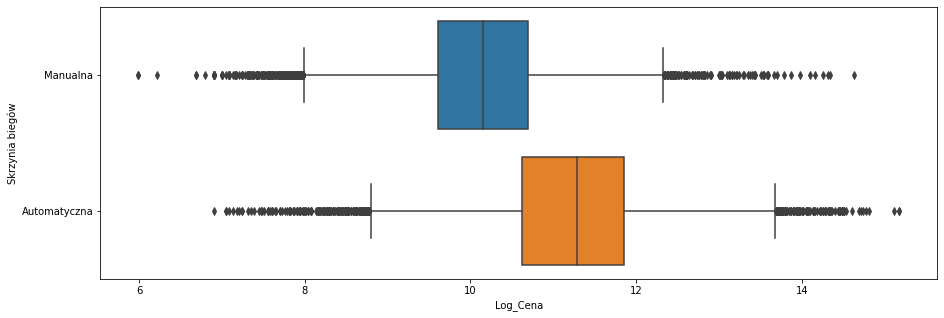

In [41]:
visualize.boxplot_price(data, 'Skrzynia biegów')

#### Column 'Napęd' (Drive type)  <a class='anchor' id='column_naped'></a>
**Type**: categorical <br>
**Needed preprocessing**: NaN to most frequent <br>
**Relation with Price**: '4x4(stały)' and '4x4(dołączany automatycznie' > Others

Column:  Napęd
Data type:  object
Number of NaN values:  11160 / 143343
Unique values:  ['4x4 (stały)' 'Na tylne koła' '4x4 (dołączany automatycznie)'
 'Na przednie koła' nan '4x4 (dołączany ręcznie)']
Number of unique values:  6


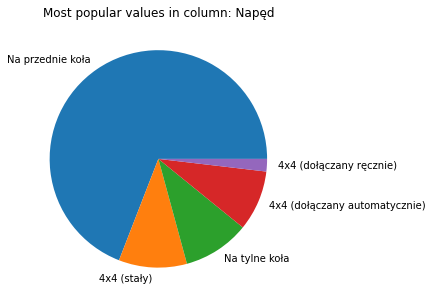

In [42]:
functions.NaN_column_report(data, 'Napęd')
visualize.values_occurence(data, 'Napęd', pie=True)

There are some NaN values, but we can replace them with the most popular category: Na przednie koła.

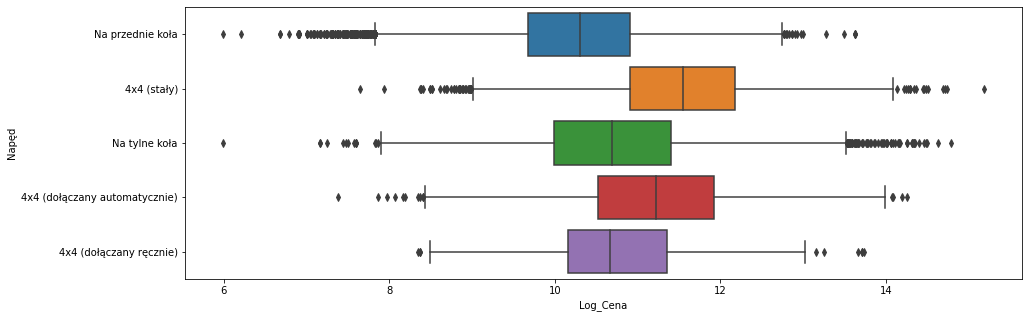

In [43]:
visualize.boxplot_price(data, 'Napęd')

#### Column 'Spalanie W Mieście' (Fuel consumption in the city)  <a class='anchor' id='column_spalanie_w_miescie'></a>
**To be removed**

In [44]:
functions.NaN_column_report(data, 'Spalanie W Mieście')

Column:  Spalanie W Mieście
Data type:  object
Number of NaN values:  59455 / 143343
Unique values:  ['14,40 l/100km' nan '13 l/100km' '6,40 l/100km' '12 l/100km' '14 l/100km'
 '5 l/100km' '7 l/100km' '6,60 l/100km' '7,70 l/100km']
Number of unique values:  214


Lots of NaN values that are difficult to replace with any sensible value. Column should be removed.

#### Columns 'Typ nadwozia' (Type of car body)  <a class='anchor' id='column_typ_nadwozia'></a>
**Type**: categorical <br>
**Relation with Price**: 'SUV' and 'Coupe' > Others > 'Auta miejskie' and 'Auta małe'

Column:  Typ nadwozia
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Sedan' 'SUV' 'Coupe' 'Kombi' 'Kompakt' 'Auta miejskie' 'Minivan'
 'Auta małe' 'Kabriolet']
Number of unique values:  9


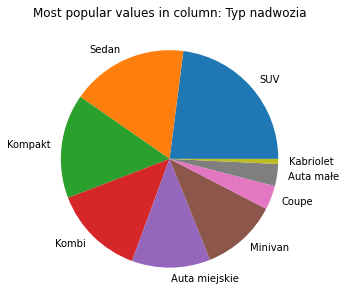

In [45]:
functions.NaN_column_report(data, 'Typ nadwozia')
visualize.values_occurence(data, 'Typ nadwozia', pie=True)

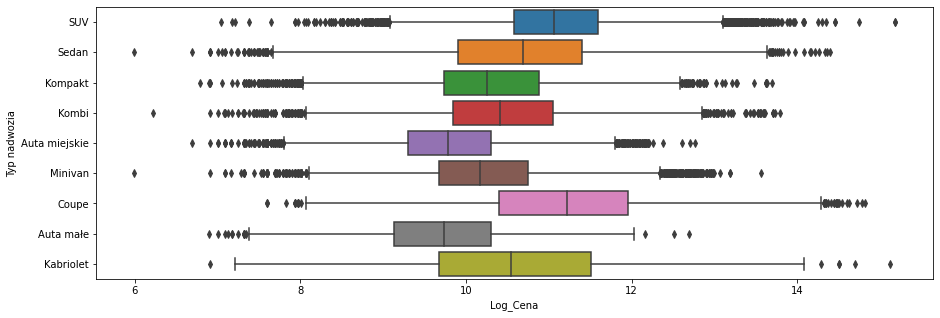

In [46]:
visualize.boxplot_price(data, 'Typ nadwozia')

#### Column 'Emisja CO2' (CO2 emissions)  <a class='anchor' id='column_emisjaco2'></a>
**To be removed**

In [47]:
functions.NaN_column_report(data, 'Emisja CO2')

Column:  Emisja CO2
Data type:  object
Number of NaN values:  76124 / 143343
Unique values:  ['275 g/km' nan '225 g/km' '327 g/km' '142 g/km' '234 g/km' '122 g/km'
 '158 g/km' '108 g/km' '135 g/km']
Number of unique values:  371


Lots of NaN values that are difficult to replace with any sensible value. Column should be removed.

#### Column 'Liczba drzwi' (Number of doors)  <a class='anchor' id='column_liczba_drzwi'></a>
**Type**: numerical <br>
**Needed preprocessing**: NaN to most frequent <br>
**Relation with Price**: 3 < Others

Column:  Liczba drzwi
Data type:  float64
Number of NaN values:  449 / 143343
Unique values:  [ 4.  5. nan  2.  3.  6.  7.]
Number of unique values:  7


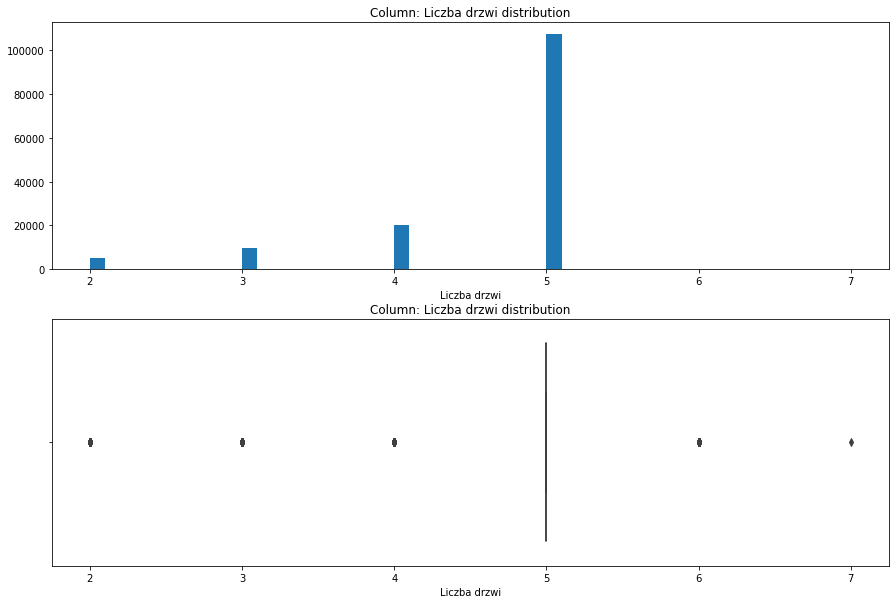

In [48]:
functions.NaN_column_report(data, 'Liczba drzwi')
visualize.distribution(data, 'Liczba drzwi')

The value 5 is strongly dominant, so we should replace NaN values with it.

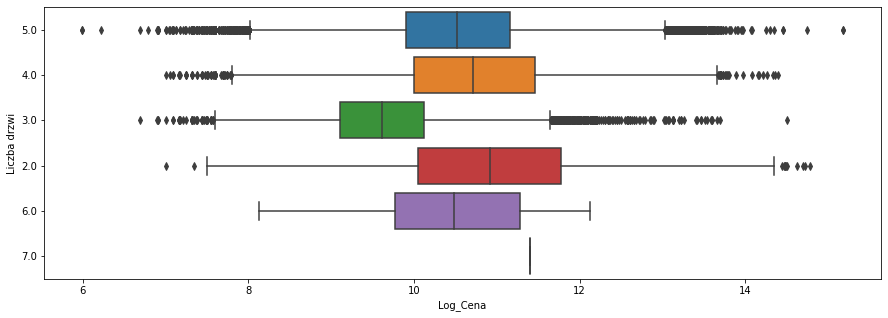

In [49]:
visualize.boxplot_price(data, 'Liczba drzwi')

#### Column 'Liczba miejsc' (Number of seats)  <a class='anchor' id='column_liczba_miejsc'></a>
**Type**: numerical <br>
**Needed preprocessing**: NaN to most frequent <br>
**Relation with Price**: 8 > Others

Column:  Liczba miejsc
Data type:  float64
Number of NaN values:  7143 / 143343
Unique values:  [ 4.  5. nan  7.  2.  8.  6.  3.  9.  1.]
Number of unique values:  10


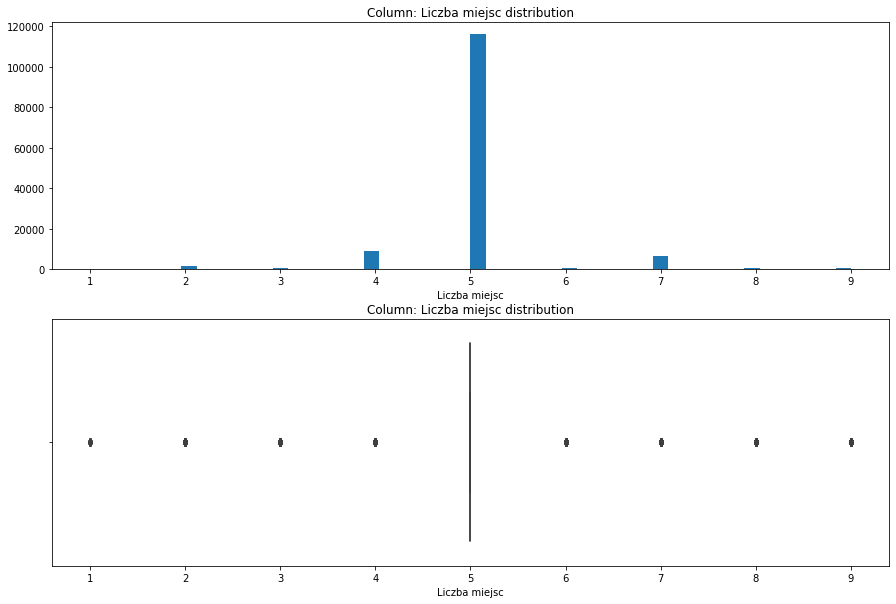

In [50]:
functions.NaN_column_report(data, 'Liczba miejsc')
visualize.distribution(data, 'Liczba miejsc')

The value 5 is strongly dominant, so we should replace NaN values with it.

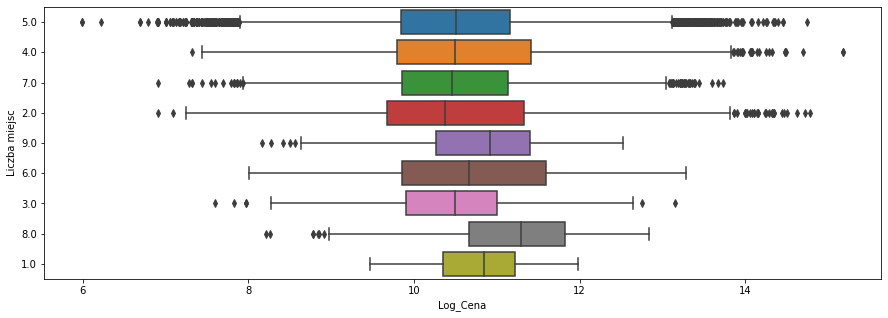

In [51]:
visualize.boxplot_price(data ,'Liczba miejsc')

#### Column 'Kolor' (Color)  <a class='anchor' id='column_kolor'></a>
**Type**: categorical <br>
**Relation with Price**: 'Czarny', 'Szary', 'Biały', 'Brązowy' > Others > 'Zielony'

Column:  Kolor
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Biały' 'Czarny' 'Niebieski' 'Szary' 'Brązowy' 'Czerwony' 'Srebrny'
 'Inny kolor' 'Beżowy' 'Złoty']
Number of unique values:  14


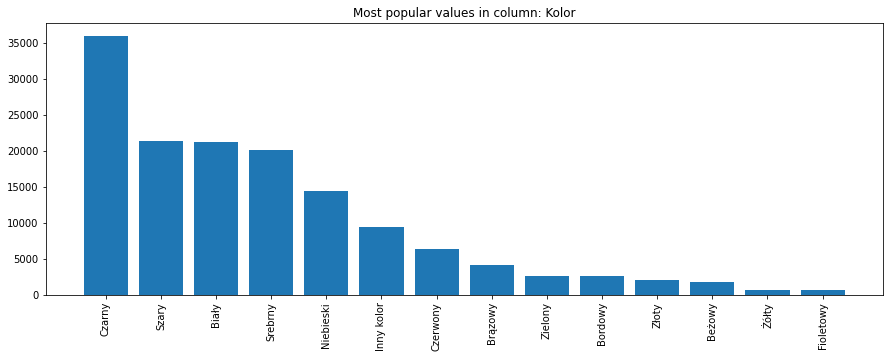

In [52]:
functions.NaN_column_report(data, 'Kolor')
visualize.values_occurence(data, 'Kolor')

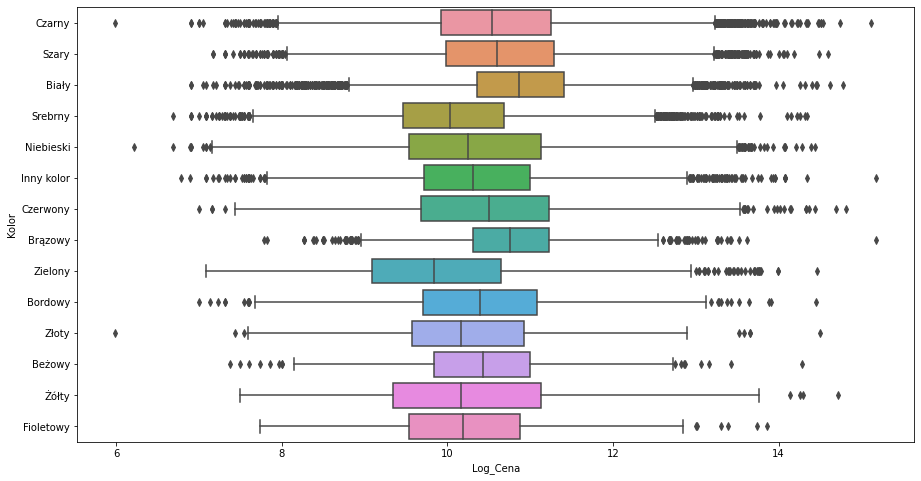

In [53]:
visualize.boxplot_price(data, 'Kolor', figsize=(15, 8))

#### Column 'Rodzaj koloru' (Color type)  <a class='anchor' id='column_rodzaj_koloru'></a>
**Type**: categorical <br>
**Needed preprocessing**: NaN to most frequent <br>
**Relation with Price**: 'Perłowy' > Others

Column:  Rodzaj koloru
Data type:  object
Number of NaN values:  36433 / 143343
Unique values:  ['Perłowy' 'Metalik' nan 'Matowy']
Number of unique values:  4


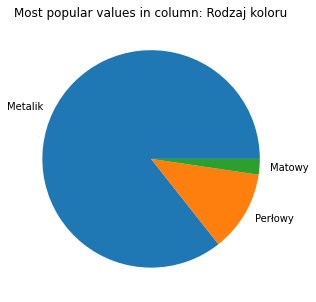

In [54]:
functions.NaN_column_report(data, 'Rodzaj koloru')
visualize.values_occurence(data, 'Rodzaj koloru', pie=True)

The value 'Metalik' is strongly dominant, so we should replace NaN values with it.

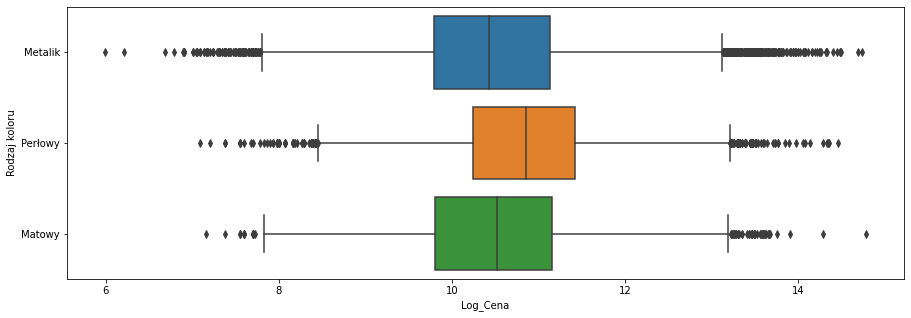

In [55]:
visualize.boxplot_price(data, 'Rodzaj koloru')

#### Column 'Możliwość finansowania' (Funding opportunities)  <a class='anchor' id='column_mozliwosc_finansowania'></a>
**Type**: binary <br>
**Needed preprocessing**: Yes/NaN to True/False <br>
**Relation with Price**: True>False

In [56]:
functions.NaN_column_report(data, 'Możliwość finansowania')

Column:  Możliwość finansowania
Data type:  object
Number of NaN values:  96140 / 143343
Unique values:  ['Tak' nan]
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [57]:
data.loc[(data['Możliwość finansowania'] == 'Tak'), 'Możliwość finansowania'] = True
data.loc[(data['Możliwość finansowania'].isna()), 'Możliwość finansowania'] = False
data['Możliwość finansowania'].head()

0     True
1     True
2    False
3     True
4    False
Name: Możliwość finansowania, dtype: object

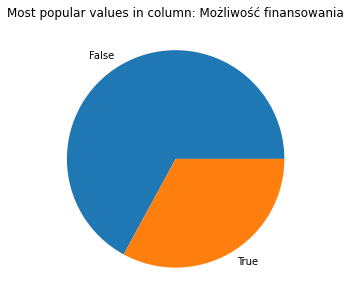

In [58]:
visualize.values_occurence(data, 'Możliwość finansowania', pie=True)

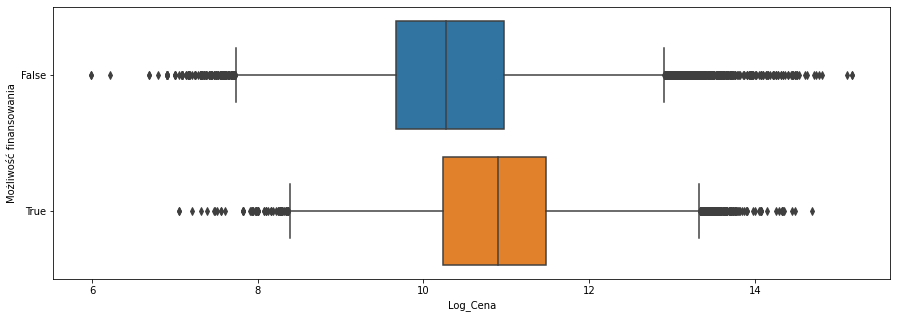

In [59]:
visualize.boxplot_price(data, 'Możliwość finansowania')

#### Column 'Zarejestrowany w Polsce' (Registered in Poland)  <a class='anchor' id='column_zarejestrowany_w_polsce'></a>
**Type**: binary <br>
**Needed preprocessing**: Yes/NaN to True/False <br>
**Relation with Price**: 'True>False

In [60]:
functions.NaN_column_report(data, 'Zarejestrowany w Polsce')

Column:  Zarejestrowany w Polsce
Data type:  object
Number of NaN values:  70881 / 143343
Unique values:  ['Tak' nan]
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [61]:
data.loc[(data['Zarejestrowany w Polsce'] == 'Tak'), 'Zarejestrowany w Polsce'] = True
data.loc[(data['Zarejestrowany w Polsce'].isna()), 'Zarejestrowany w Polsce'] = False
data['Zarejestrowany w Polsce'].head()

0    True
1    True
2    True
3    True
4    True
Name: Zarejestrowany w Polsce, dtype: object

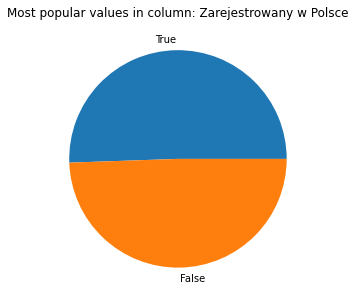

In [62]:
visualize.values_occurence(data, 'Zarejestrowany w Polsce', pie=True)

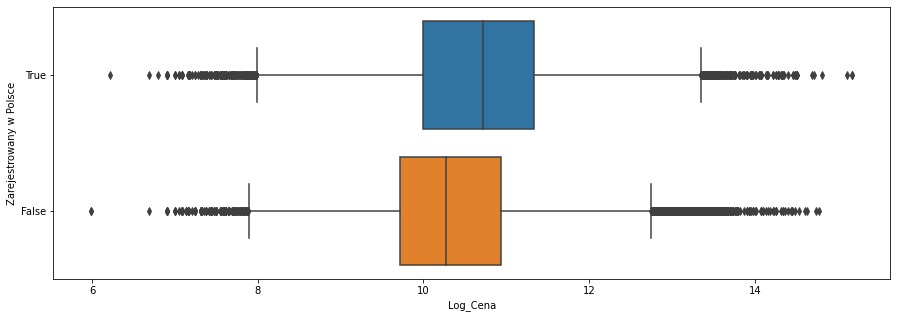

In [63]:
visualize.boxplot_price(data, 'Zarejestrowany w Polsce')

#### Column 'Pierwszy właściciel' (First owner)  <a class='anchor' id='column_pierwszy_wlasciciel'></a>
**Type**: binary <br>
**Needed preprocessing**: Yes/NaN to True/False <br>
**Relation with Price**: True>False

In [64]:
functions.NaN_column_report(data, 'Pierwszy właściciel')

Column:  Pierwszy właściciel
Data type:  object
Number of NaN values:  96125 / 143343
Unique values:  ['Tak' nan]
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [65]:
data.loc[(data['Pierwszy właściciel'] == 'Tak'), 'Pierwszy właściciel'] = True
data.loc[(data['Pierwszy właściciel'].isna()), 'Pierwszy właściciel'] = False
data['Pierwszy właściciel'].head()

0     True
1     True
2    False
3     True
4     True
Name: Pierwszy właściciel, dtype: object

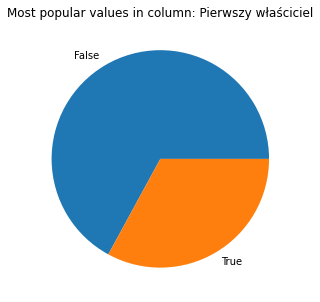

In [66]:
visualize.values_occurence(data, 'Pierwszy właściciel', pie=True)

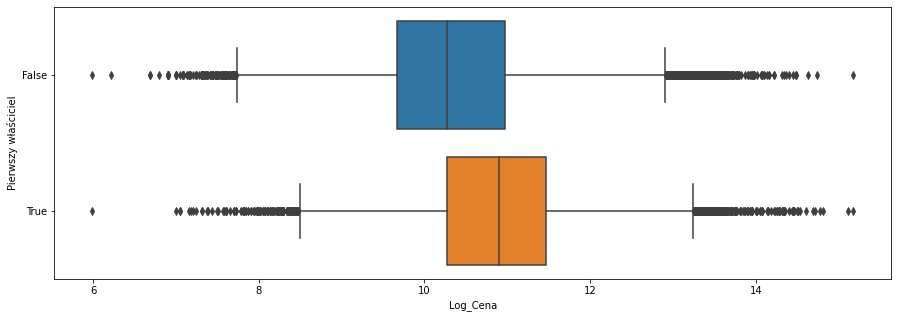

In [67]:
visualize.boxplot_price(data, 'Pierwszy właściciel')

#### Column 'Bezwypadkowy' (Accident-free)  <a class='anchor' id='column_bezwypadkowy'></a>
**Type**: binary <br>
**Needed preprocessing**: Yes/NaN to True/False <br>
**Relation with Price**: True>False

In [68]:
functions.NaN_column_report(data, 'Bezwypadkowy')

Column:  Bezwypadkowy
Data type:  object
Number of NaN values:  67834 / 143343
Unique values:  ['Tak' nan]
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [69]:
data.loc[(data['Bezwypadkowy'] == 'Tak'), 'Bezwypadkowy'] = True
data.loc[(data['Bezwypadkowy'].isna()), 'Bezwypadkowy'] = False
data['Bezwypadkowy'].head()

0     True
1     True
2    False
3     True
4     True
Name: Bezwypadkowy, dtype: object

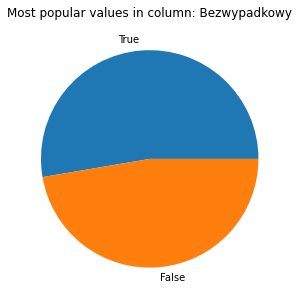

In [70]:
visualize.values_occurence(data, 'Bezwypadkowy', pie=True)

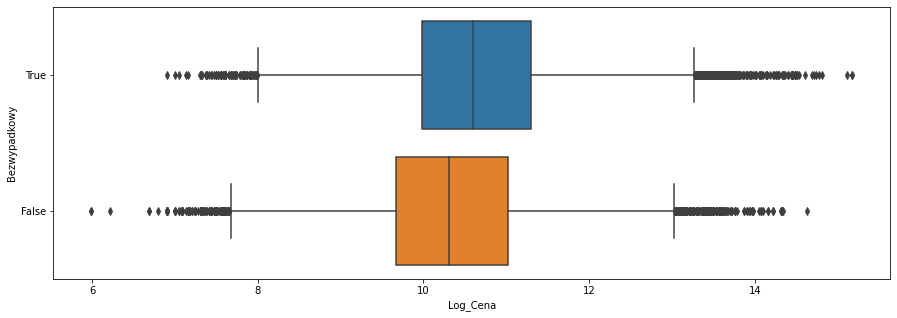

In [71]:
visualize.boxplot_price(data, 'Bezwypadkowy')

#### Column 'Serwisowany w ASO' (Serviced at ASO)  <a class='anchor' id='column_serwisowany_w_aso'></a>
**Type**: binary <br>
**Needed preprocessing**: Yes/NaN to True/False <br>
**Relation with Price**: True>False

In [72]:
functions.NaN_column_report(data, 'Serwisowany w ASO')

Column:  Serwisowany w ASO
Data type:  object
Number of NaN values:  73732 / 143343
Unique values:  ['Tak' nan]
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [73]:
data.loc[(data['Serwisowany w ASO'] == 'Tak'), 'Serwisowany w ASO'] = True
data.loc[(data['Serwisowany w ASO'].isna()), 'Serwisowany w ASO'] = False
data['Serwisowany w ASO'].head()

0     True
1     True
2    False
3     True
4     True
Name: Serwisowany w ASO, dtype: object

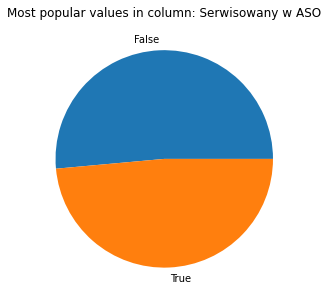

In [74]:
visualize.values_occurence(data, 'Serwisowany w ASO', pie=True)

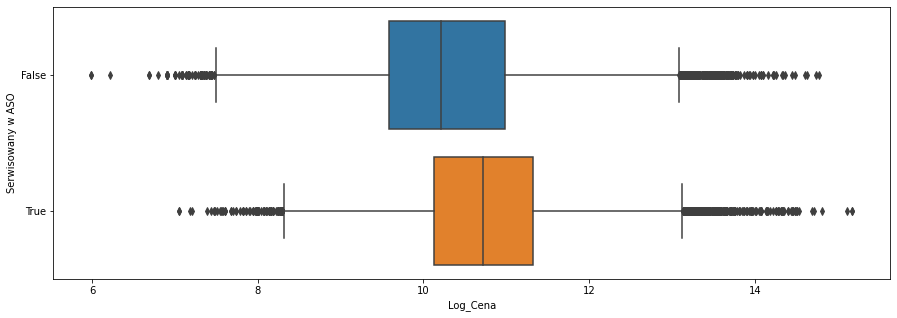

In [75]:
visualize.boxplot_price(data, 'Serwisowany w ASO')

#### Column 'Stan' (Condition) <a class='anchor' id='column_stan'></a>
**Type**: categorical <br>
**Relation**: 'Nowe'>'Używane

Column:  Stan
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Używane' 'Nowe']
Number of unique values:  2


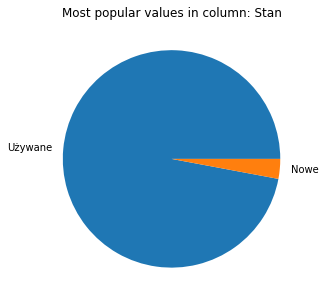

In [76]:
functions.NaN_column_report(data, 'Stan')
visualize.values_occurence(data, 'Stan', pie=True)

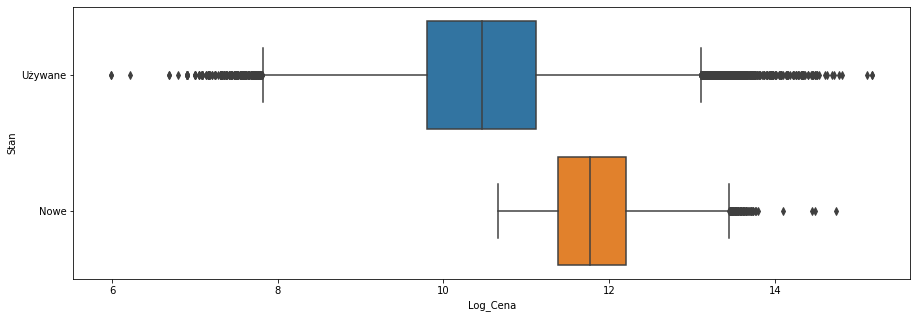

In [77]:
visualize.boxplot_price(data, 'Stan')

#### Column 'Wyposażenie' (Features)  <a class='anchor' id='column_wyposazenie'></a>
**To be removed**

In [78]:
functions.NaN_column_report(data, 'Wyposażenie')

Column:  Wyposażenie
Data type:  object
Number of NaN values:  9123 / 143343
Unique values:  ["['ABS', 'Elektryczne szyby przednie', 'Poduszka powietrzna kierowcy', 'Wspomaganie kierownicy', 'ASR (kontrola trakcji)', 'Bluetooth', 'Czujnik zmierzchu', 'Elektrochromatyczne lusterka boczne', 'Elektrycznie ustawiane fotele', 'Gniazdo SD', 'Kamera cofania', 'Komputer pokładowy', 'MP3', 'Podgrzewana przednia szyba', 'Podgrzewane tylne siedzenia', 'Poduszki boczne tylne', 'System Start-Stop', 'Światła LED', 'Tempomat', 'Wielofunkcyjna kierownica', 'CD', 'Elektrycznie ustawiane lusterka', 'Poduszka powietrzna pasażera', 'Alarm', 'Asystent parkowania', 'Czujnik deszczu', 'Czujniki parkowania przednie', 'Elektrochromatyczne lusterko wsteczne', 'ESP (stabilizacja toru jazdy)', 'Gniazdo USB', 'Klimatyzacja automatyczna', 'Kurtyny powietrzne', 'Nawigacja GPS', 'Podgrzewane lusterka boczne', 'Poduszka powietrzna chroniąca kolana', 'Przyciemniane szyby', 'Szyberdach', 'Światła przeciwmgielne', 'Tempo

A lot of missing data that cannot be sensibly replaced. Column should be removed.

In [79]:
data.drop('Wyposażenie', axis=1, inplace=True)

#### Column 'Opis' (Description)  <a class='anchor' id='column_opis'></a>
**To be removed**

In [80]:
functions.NaN_column_report(data, 'Opis')

Column:  Opis
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ["\n        Wybrane elementy wyposażenia: \r\n!!! MAX OPCJA WYPOSAŻENIA POJAZDU!!!\r\n!!! MASERATI QUATTROPORTE SQ4 - GRANDSPORT - PO LIFCIE\r\n!!! Najmocniejszym z silników V6 Twin Turbo moc ( 430 KM)\r\nAWD, ABS, ESP, Regulowane zawieszenie, Regulacja trybu jazdy SPORT-COMFORT wraz dźwiękiem układu wydechowego, Skóra czerwona, System stabilizacji toru jazdy MSP, Nawigacja + DVD + EKRAN nawigacji LCD dotykowy, '20 Al felgi, Pakiet: Key-Less - odpalanie pojazdu za pomocą guzika bez ingerencji kluczyka oraz otwieranie i zamykanie pojazdu na dotyk klamki - system STAR/STOP, Skrzynia biegów ZF- 8 stopniowa skrzynia biegów, Pakiet oświetlenia wnętrza, Asystent parkowania wraz z kamerą cofania, System kamer 360 stopni, ACC - aktywny tempomat - radar w zderzak utrzymujący odległość pomiędzy pojazdami, Pełna elektryka siedzeń: przód wraz z pamięciami, wentylacją i podgrzewaniem, Wykończenie wnętrza w czarnym dr

Number of unique values:  136385


Requires text analysis. Column should be removed.

In [81]:
data.drop('Opis', axis=1, inplace=True)

#### Column 'Miasto' (City)  <a class='anchor' id='column_miasto'></a>
**To be removed**

In [82]:
functions.NaN_column_report(data, 'Miasto')

Column:  Miasto
Data type:  object
Number of NaN values:  0 / 143343
Unique values:  ['Katowicka 4 - 41-300 Dąbrowa Górnicza, Śląskie (Polska)'
 'ul. Mieszka I 25B - 70-007 Szczecin, Zachód (Polska)'
 'Tłuszcz, wołomiński, Mazowieckie'
 'Aleja Grunwaldzka 270 - 80-314 Gda Gdańsk, Oliwa (Polska)'
 'Ostrobramska 73 - 04-175 Warszawa, Praga-Południe (Polska)'
 'Warszawa, Mazowieckie, Włochy'
 'Ostrów Mazowiecka, ostrowski, Mazowieckie'
 'ul.Grota Roweckiego 10 - 30-348 Kraków, Podgórze (Polska)'
 'ul.Wrocławska 89 - 58-306 Wałbrzych, Dolnośląskie (Polska)'
 'Wał Miedzieszyński 117 - 04-987 Warszawa, Wawer (Polska)']
Number of unique values:  11602


No structured data format. Column should be removed.

In [83]:
data.drop('Miasto', axis=1, inplace=True)

#### Columns 'Sz. geograficzna' (Latitude)  <a class='anchor' id='column_sz_geograficzna'></a>
**Type**: numerical <br>
**Needed preprocessing**: remove outliers

Column:  Sz. geograficzna
Data type:  float64
Number of NaN values:  0 / 143343
Unique values:  [50.31625124 53.43804    52.43049    54.40759    52.23876    52.19255
 52.80201    50.03163077 50.784      52.15867317]
Number of unique values:  7669


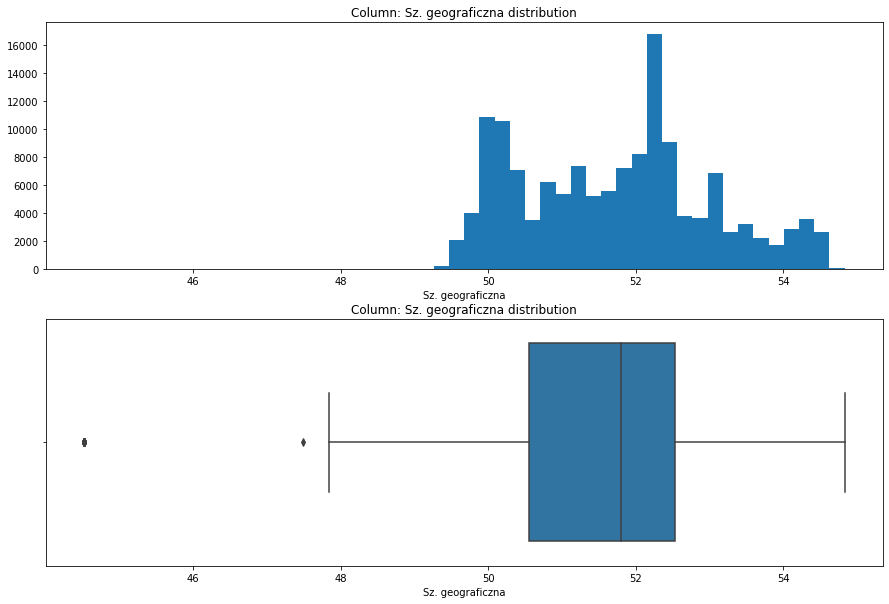

In [84]:
functions.NaN_column_report(data, 'Sz. geograficzna')
visualize.distribution(data, 'Sz. geograficzna')

#### Column 'Dł. geograficzna' (Longitude)  <a class='anchor' id='column_dl_geograficzna'></a>
**Type**: numerical <br> 
**Needed preprocessing**: remove outliers

Column:  Dł. geograficzna
Data type:  float64
Number of NaN values:  0 / 143343
Unique values:  [19.20345495 14.50691    21.43784    18.56499    21.08553    20.93517
 21.89205    19.91886096 16.2843     21.1722748 ]
Number of unique values:  7658


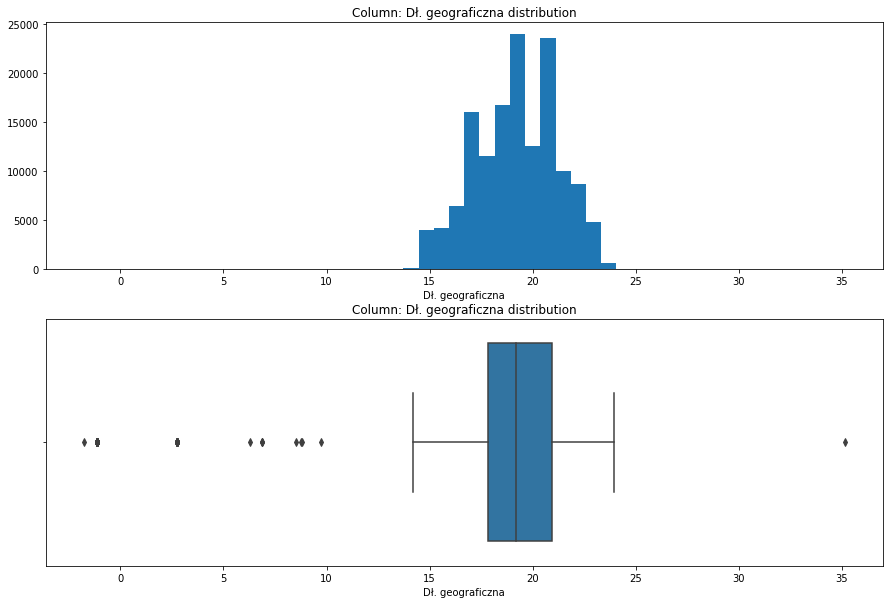

In [85]:
functions.NaN_column_report(data, 'Dł. geograficzna')
visualize.distribution(data, 'Dł. geograficzna')

#### Column 'Generacja' (Generation)  <a class='anchor' id='column_generacja'></a>
**To be removed**

Column:  Generacja
Data type:  object
Number of NaN values:  43094 / 143343
Unique values:  [nan 'V (2018-)' 'III (2013-)' 'F10/F11 (2009-2017)' 'B9 (2015-)'
 '8T (2007-2016)' 'G30/G31 (2017-)' 'X351 (2009-)' 'F01 (2008-2015)'
 'C218 (2011-)']
Number of unique values:  582


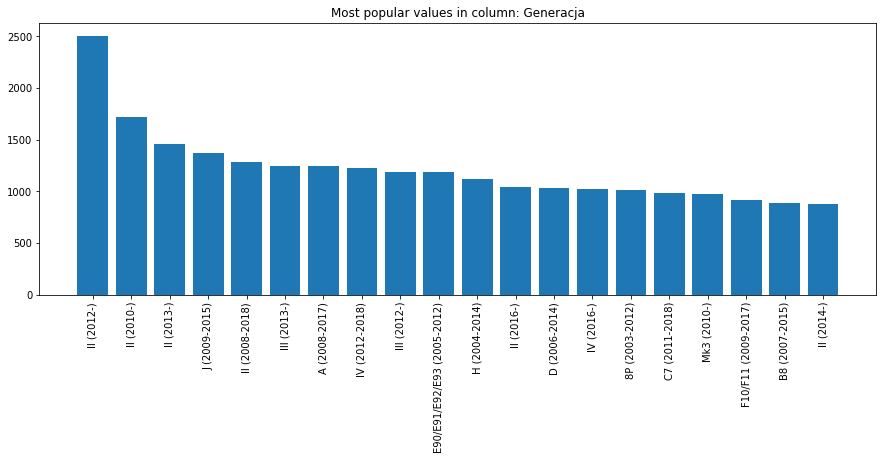

In [86]:
functions.NaN_column_report(data, 'Generacja')
visualize.values_occurence(data, 'Generacja')

A very large number of missing values that cannot be sensibly replaced. The column should be removed.

In [87]:
data.drop('Generacja', axis=1, inplace=True)

#### Columns 'Faktura VAT' (VAT invoice)  <a class='anchor' id='column_faktura_vat'></a>
**Type**: binary <br>
**Needed preprocessing**: Tak/NaN to True/False <br>
**Relation with Price**: True>False

In [88]:
functions.NaN_column_report(data, 'Faktura VAT')

Column:  Faktura VAT
Data type:  object
Number of NaN values:  112819 / 143343
Unique values:  [nan 'Tak']
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [89]:
data.loc[(data['Faktura VAT'] == 'Tak'), 'Faktura VAT'] = True
data.loc[(data['Faktura VAT'].isna()), 'Faktura VAT'] = False
data['Faktura VAT'].head()

0    False
1     True
2    False
3     True
4     True
Name: Faktura VAT, dtype: object

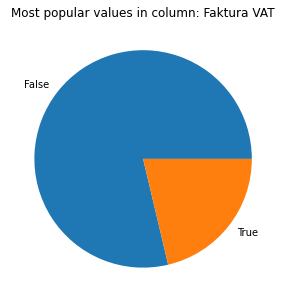

In [90]:
visualize.values_occurence(data, 'Faktura VAT', pie=True)

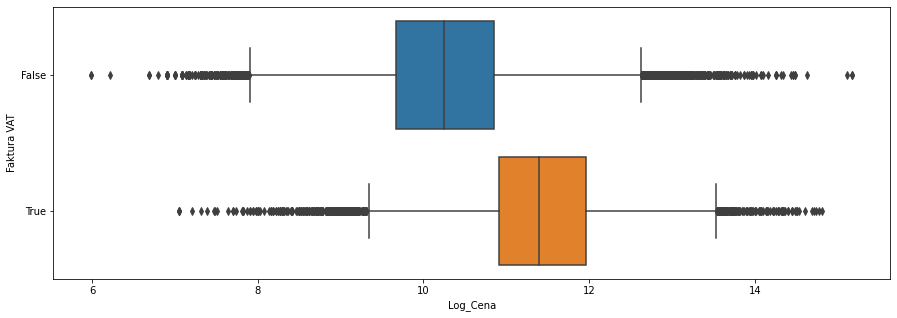

In [91]:
visualize.boxplot_price(data, 'Faktura VAT')

#### Columns 'Leasing'  <a class='anchor' id='column_leasing'></a>
**Type**: binary <br>
**Needed preprocessing**: Tak/NaN to True/False <br>
**Relation with Price**: True>False

In [92]:
functions.NaN_column_report(data, 'Leasing')

Column:  Leasing
Data type:  object
Number of NaN values:  124450 / 143343
Unique values:  [nan 'Tak']
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [93]:
data.loc[(data['Leasing'] == 'Tak'), 'Leasing'] = True
data.loc[(data['Leasing'].isna()), 'Leasing'] = False
data['Leasing'].head()

0    False
1     True
2    False
3     True
4     True
Name: Leasing, dtype: object

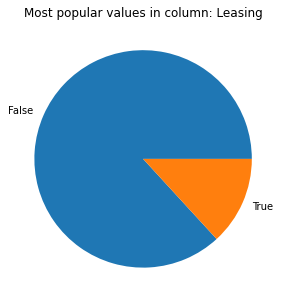

In [94]:
visualize.values_occurence(data, 'Leasing', pie=True)

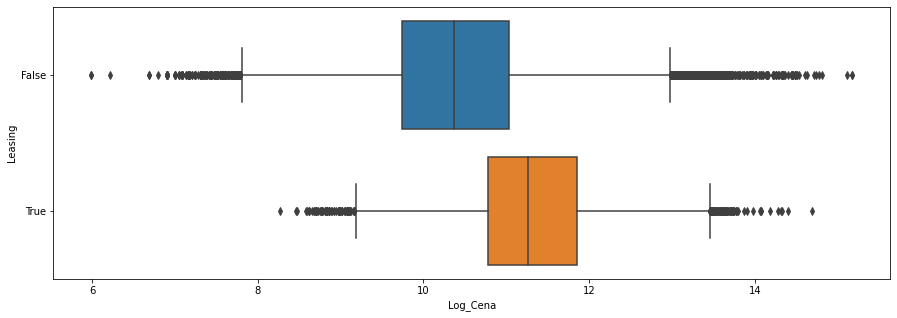

In [95]:
visualize.boxplot_price(data, 'Leasing')

#### Column 'Kraj pochodzenia' (Country of origin)  <a class='anchor' id='column_kraj_pochodzenia'></a>
**Type**: categorical <br>
**Needed preprocessing**: NaN to most frequent <br>
**Relation with Price**: some countries are more expensive

Column:  Kraj pochodzenia
Data type:  object
Number of NaN values:  60164 / 143343
Unique values:  [nan 'Polska' 'Niemcy' 'Stany Zjednoczone' 'Francja' 'Austria' 'Belgia'
 'Hiszpania' 'Kanada' 'Inny']
Number of unique values:  37


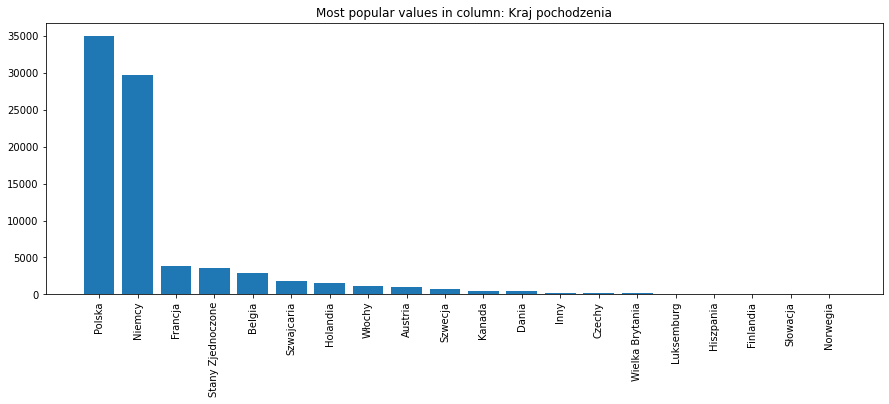

In [96]:
functions.NaN_column_report(data, 'Kraj pochodzenia')
visualize.values_occurence(data, 'Kraj pochodzenia')

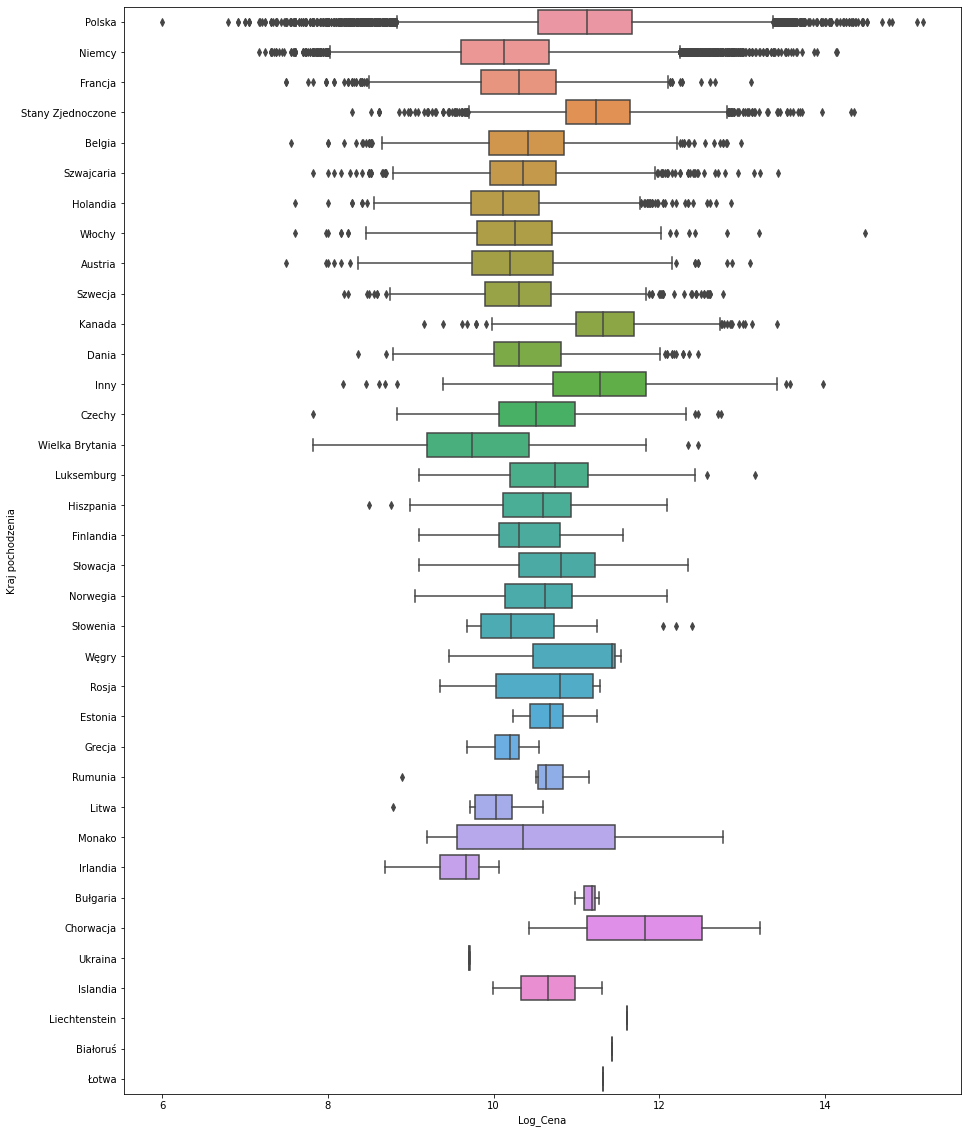

In [97]:
visualize.boxplot_price(data, 'Kraj pochodzenia', figsize=(15, 20))

The otomoto portal comes from Poland and we can assume that most cars are from Poland. Missing values should be filled in with the most frequent value: Poland.

#### Column 'Pierwsza rejestracja' (First registration)  <a class='anchor' id='column_pierwsza_rejestracja'></a>
**To be removed**

In [98]:
functions.NaN_column_report(data, 'Pierwsza rejestracja')

Column:  Pierwsza rejestracja
Data type:  object
Number of NaN values:  74289 / 143343
Unique values:  [nan '13/04/2018' '13/07/2015' '26/02/2015' '10/01/2013' '16/01/2014'
 '12/08/2016' '20/04/2017' '10/07/2013' '01/11/2012']
Number of unique values:  8192


A very large number of missing values that cannot be sensibly replaced. The column should be removed.

In [99]:
data.drop('Pierwsza rejestracja', axis=1, inplace=True)

#### Column 'Numer rejestracyjny pojazdu' (Vehicle registration number)  <a class='anchor' id='column_numer_rejestracyjny_pojazdu'></a>
**To be removed**

In [100]:
functions.NaN_column_report(data, 'Numer rejestracyjny pojazdu')

Column:  Numer rejestracyjny pojazdu
Data type:  object
Number of NaN values:  100995 / 143343
Unique values:  [nan 'WW 215YM' 'SK 341CU' 'PZ444LG' 'SPI09344' 'DW6T736' 'WPI96095'
 'PWR962CY' 'PGN110HN' 'NO7253U']
Number of unique values:  40221


The registration number is randomly assigned by the office and does not affect the price of the vehicle. The column should be removed.

In [101]:
data.drop('Numer rejestracyjny pojazdu', axis=1, inplace=True)

#### Column 'VAT marża' (VAT margin)  <a class='anchor' id='column_vat_marza'></a>
**Type**: binary <br>
**Needed preprocessing**: Tak/NaN to True/False <br>
**Relation with Price**: False>True

In [102]:
functions.NaN_column_report(data, 'VAT marża')

Column:  VAT marża
Data type:  object
Number of NaN values:  91194 / 143343
Unique values:  [nan 'Tak']
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [103]:
data.loc[(data['VAT marża'] == 'Tak'), 'VAT marża'] = True
data.loc[(data['VAT marża'].isna()), 'VAT marża'] = False
data['VAT marża'].head()

0    False
1    False
2    False
3    False
4    False
Name: VAT marża, dtype: object

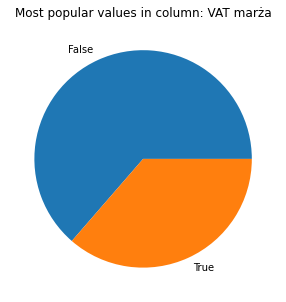

In [104]:
visualize.values_occurence(data, 'VAT marża', pie=True)

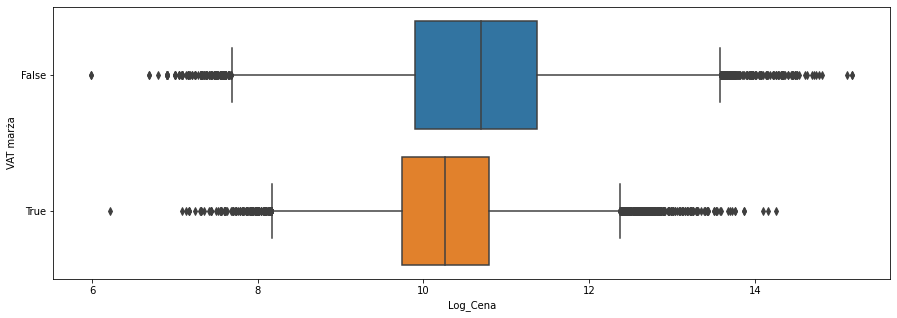

In [105]:
visualize.boxplot_price(data, 'VAT marża')

#### Column 'Uszkodzony' (Damaged)  <a class='anchor' id='column_uszkodzony'></a>
**Type**: binary <br>
**Needed preprocessing**: Tak/NaN to True/False <br>
**Relation with Price**: False>True

In [106]:
functions.NaN_column_report(data, 'Uszkodzony')

Column:  Uszkodzony
Data type:  object
Number of NaN values:  134691 / 143343
Unique values:  [nan 'Tak']
Number of unique values:  2


Two possible values: Yes or NaN. We should convert to binary column where: Yes -> 1/True, NaN -> 0/False

In [107]:
data.loc[(data['Uszkodzony'] == 'Tak'), 'Uszkodzony'] = True
data.loc[(data['Uszkodzony'].isna()), 'Uszkodzony'] = False
data['Uszkodzony'].head()

0    False
1    False
2    False
3    False
4    False
Name: Uszkodzony, dtype: object

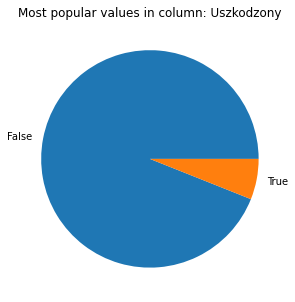

In [108]:
visualize.values_occurence(data, 'Uszkodzony', pie=True)

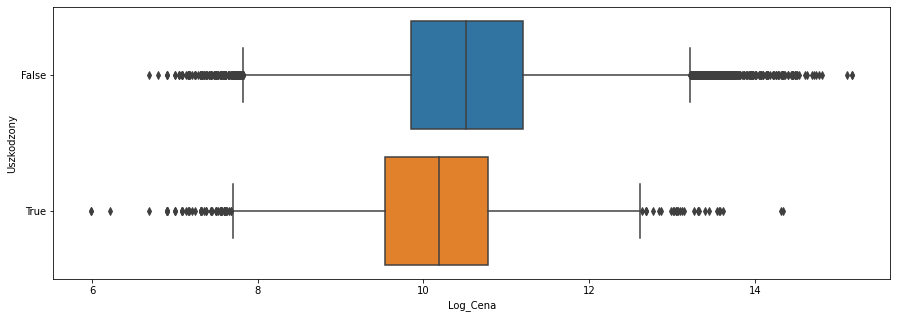

In [109]:
visualize.boxplot_price(data, 'Uszkodzony')

## Save to CSV

In [112]:
data.to_csv('data_analysis.csv')

## Correlation

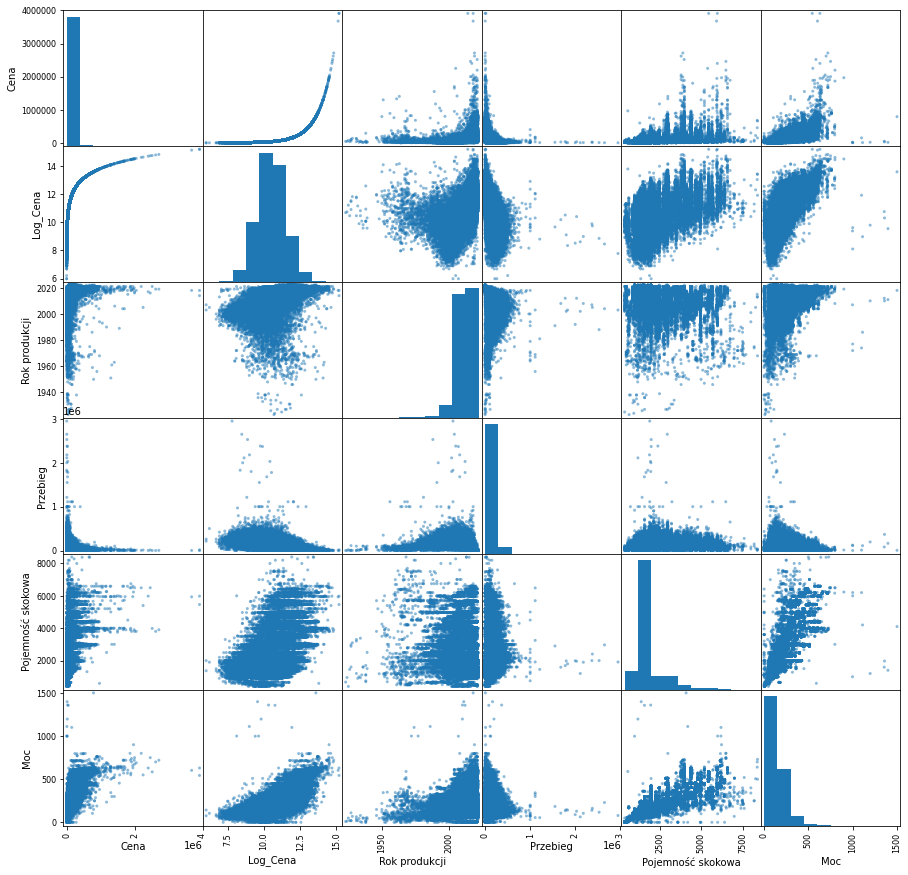

In [110]:
numerical_columns_technical = ['Cena','Log_Cena', 'Rok produkcji', 'Przebieg','Pojemność skokowa', 'Moc']
pd.plotting.scatter_matrix(data[numerical_columns_technical], figsize=(15, 15))
plt.show()

In [111]:
# For visualization purposes
data['Moc_x_Pojemność_skokowa'] = data['Moc'] * data['Pojemność skokowa']
data['Log_Moc_x_Pojemność_skokowa'] = data['Moc_x_Pojemność_skokowa'].apply(lambda x: np.log(x))

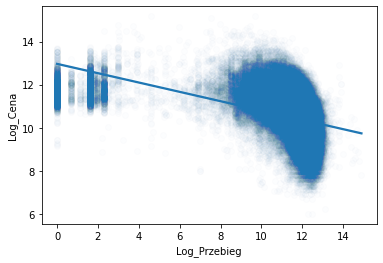

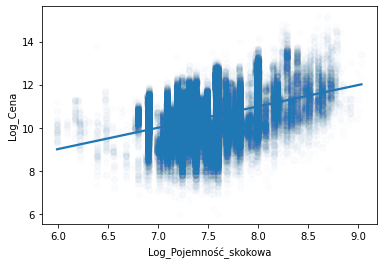

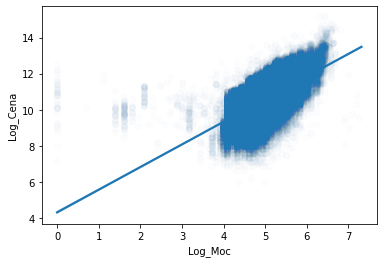

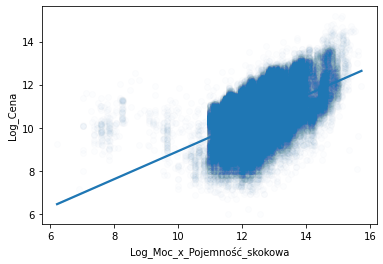

In [112]:
for column in ['Log_Przebieg', 'Log_Pojemność_skokowa', 'Log_Moc', 'Log_Moc_x_Pojemność_skokowa']:
    sns.regplot(x=data[column], y=data['Log_Cena'], scatter_kws={'alpha':0.01})
    plt.show()

<AxesSubplot:>

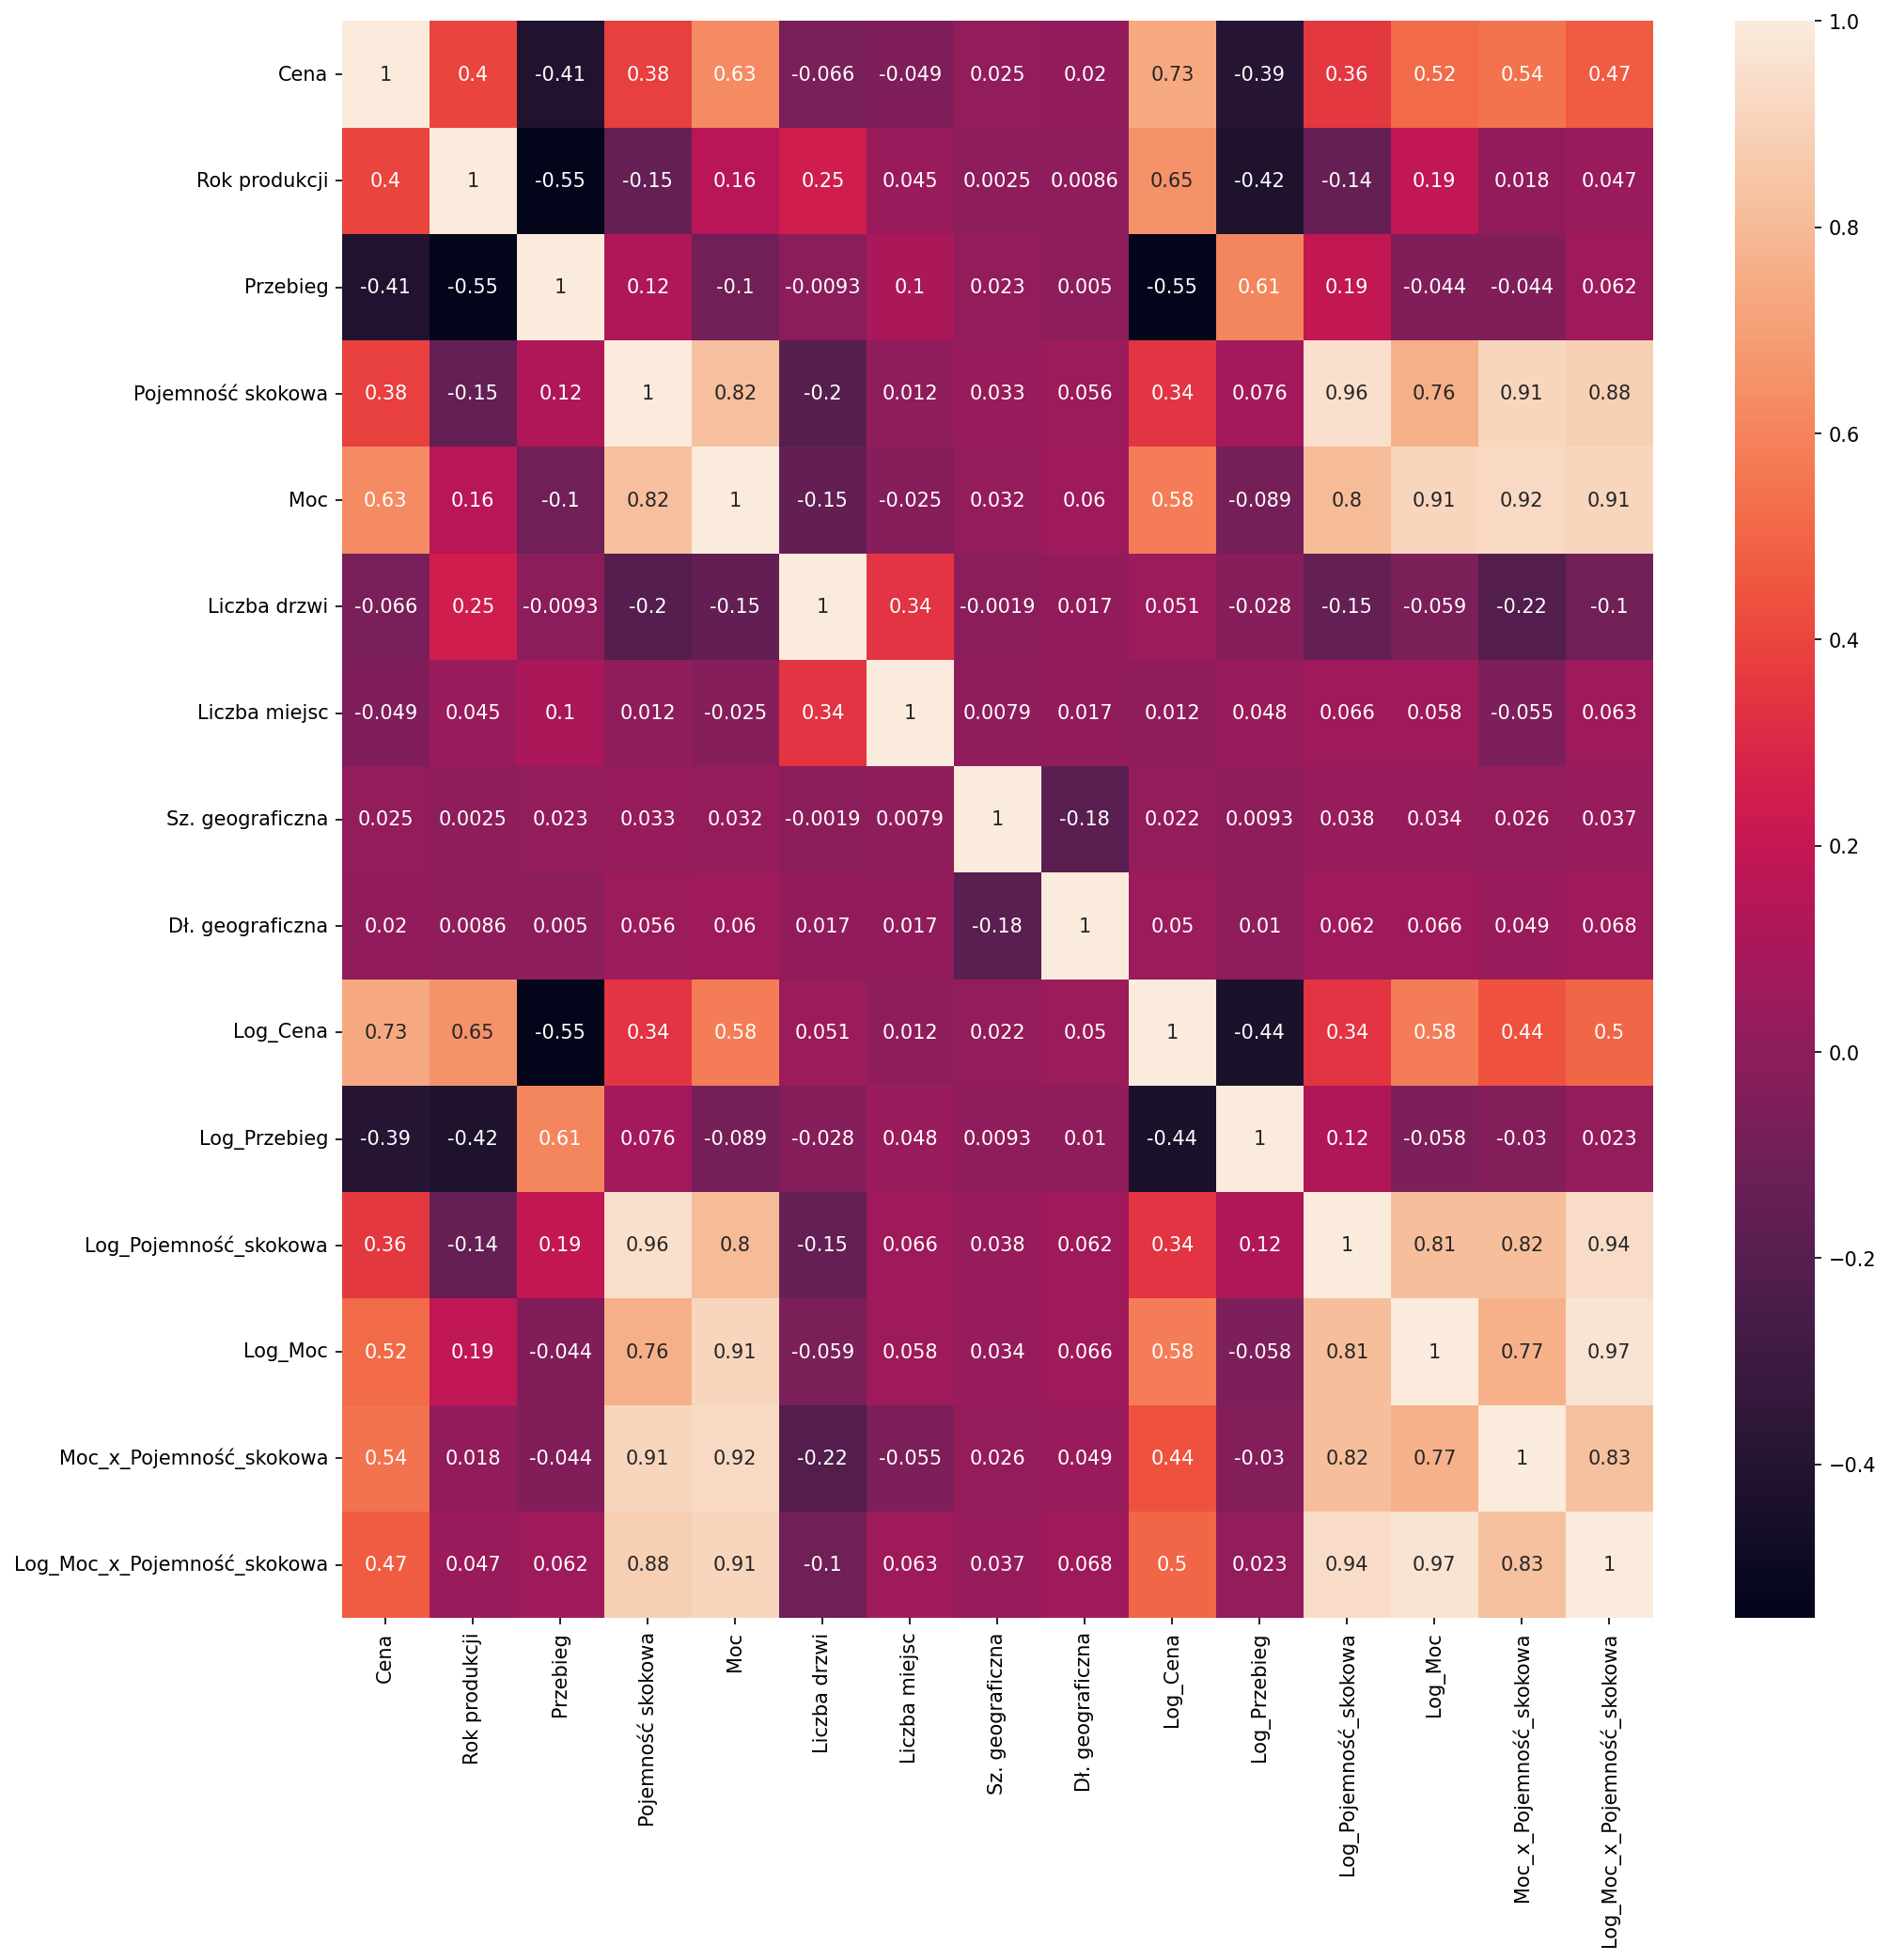

In [113]:
plt.figure(figsize=(15, 15), dpi=150)
sns.heatmap(data.corr(), annot=data.corr())

**Observable correlations:**
1. Moc + Pojemność skokowa
2. Cena + Moc
3. Cena + Moc x Pojemność skokowa
4. Cena + Przebieg
5. Cena + Pojemność skokowa

# Summary <a class='anchor' id='column_summary'></a>

### Columns
| Column name | Should be removed? | Data type | Needed preprocessing | 
| --- | --- | --- | --- | 
| Cena (Price) | No | Numerical | Remove outliers | 
| Rok produkcji (Year of production | No | Numerical | | 
| Przebieg (Mileage) | No | Numerical | Remove km, Convert string to float, Remove outliers, Remove rows with NaN | 
| Pojemność skokowa (Cubic capacity) | No | Numerical | Remove cm3, Convert string to float, Remove rows with NaN |
| Moc (Power) | No | Numerical | Remove KM, Convert string to float, Remove rows with NaN, Maybe remove outliers | 
| Liczba drzwi (Number of doors) | No | Numerical | NaN to most frequent | 
| Liczba miejsc (Number of seats) | No | Numerical | NaN to most frequent | 
| Sz. geograficzna (Latitude) | No | Numerical | | 
| Dł. geograficzna (Longitude) | No | Numerical | |
| Oferta od (Offer from) | No | Categorical | | 
| Marka pojazdu (Car brand) | No | Categorical | | 
| Model pojazdu (Car model) | Maybe | Categorical | | 
| Rodzaj paliwa (Fuel type) | No | Categorical | | 
| Skrzynia biegów (Gearbox) | No | Categorical | NaN to most frequent | 
| Napęd (Drive type) | No | Categorical | NaN to most frequent | 
| Typ nadwozia (Type of car body) | No | Categorical | | 
| Kolor (Color) | No | Categorical | | 
| Rodzaj koloru (Color type) | No | Categorical | NaN to most frequent | 
| Stan (Condition) | No | Categorical | | 
| Kraj pochodzenia (Country of origin) | No | Categorical | NaN to most frequent | 
| Możliwość finansowania (Funding opportunities) | No | Binary | Yes/NaN to True/False | 
| Zarejestrowany w Polsce (Registered in Poland) | No | Binary | Yes/NaN to True/False | 
| Pierwszy właściciel (First owner) | No | Binary | Yes/NaN to True/False | 
| Bezwypadkowy (Accident-free) | No | Binary | Yes/NaN to True/False | 
| Serwisowany w ASO (Serviced at ASO) | No | Binary | Yes/NaN to True/False | 
| Faktura VAT (VAT Invoice) | No | Binary | Yes/NaN to True/False | 
| Leasing | No | Binary | Yes/NaN to True/False | 
| VAT marża (VAT margin) | No | Binary | Yes/NaN to True/False | 
| Uszkodzony (Damaged) | No | Binary | Yes/NaN to True/False | 
| id | Yes |
| Kategoria (Category) | Yes | 
| Wersja (Version) | Yes |
| Spalanie W Mieście (Fuel consumption in the city) | Yes |
| Emisja CO2 (CO2 emissions) | Yes |
| Wyposażenie (Features) | Yes |
| Opis (Description) | Yes |
| Miasto (City) | Yes |
| Generacja (Generation) | Yes | 
| Okres gwarancji producenta | Yes |
| Spalanie W Cyklu Mieszanym | Yes |
| Spalanie Poza Miastem | Yes |
| Numer rejestracyjny pojazdu | Yes | 
| Filtr cząstek stałych | Yes | 
| Opłata początkowa | Yes |
| Miesięczna rata | Yes | 
| Liczba pozostałych rat | Yes | 
| Wartość wykupu | Yes | 
| lub do (przebieg km) | Yes |
| Tuning | Yes | 
| Gwarancja dealerska (w cenie) | Yes |
| Kierownica po prawej (Anglik) | Yes |
| Homologacja ciężarowa | Yes |
| Zarejestrowany jako zabytek | Yes | 
| VIN | Yes |
| Pierwsza rejestracja | Yes |

### New features to test:
- Log(Przebieg)
- Log(Pojemność skokowa)
- Log(Moc)
- Pojemność skokowa x Moc
- Log(Pojemność skokowa x Moc)